<a href="https://colab.research.google.com/github/0in11/DL/blob/main/CNN/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
import numpy as np
import os

%load_ext autoreload
%autoreload 2

os.chdir('drive/MyDrive/DL202010821/CNN')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization, ReLU, Add, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


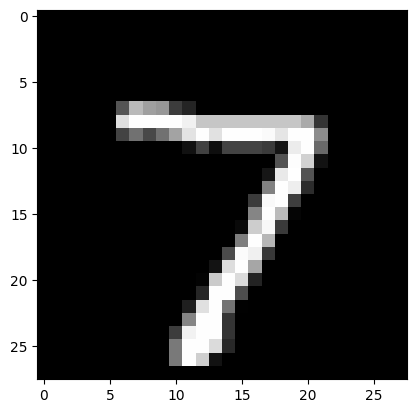

In [ ]:
plt.imshow(x_test[0], cmap = 'gray')
plt.show()

In [ ]:
model = Sequential([
    # C1: Convolutional Layer
    Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1), padding='same'),
    # S2: Subsampling Layer (Average Pooling)
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),

    # C3: Convolutional Layer
    Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'),
    # S4: Subsampling Layer (Average Pooling)
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),

    # C5: Convolutional Layer
    Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'),
    Flatten(),

    # F6: Fully Connected Layer
    Dense(84, activation='relu'),

    # Output Layer
    Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split = 0.1)
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.3f}')

Epoch 1/10
422/422 [==============================] - 4s 6ms/step - loss: 0.3999 - accuracy: 0.8832 - val_loss: 0.1291 - val_accuracy: 0.9640
Epoch 2/10
422/422 [==============================] - 2s 6ms/step - loss: 0.1198 - accuracy: 0.9634 - val_loss: 0.0796 - val_accuracy: 0.9775
Epoch 3/10
422/422 [==============================] - 3s 7ms/step - loss: 0.0860 - accuracy: 0.9737 - val_loss: 0.0681 - val_accuracy: 0.9830
Epoch 4/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0658 - accuracy: 0.9799 - val_loss: 0.0639 - val_accuracy: 0.9815
Epoch 5/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0554 - accuracy: 0.9827 - val_loss: 0.0536 - val_accuracy: 0.9838
Epoch 6/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0477 - accuracy: 0.9850 - val_loss: 0.0492 - val_accuracy: 0.9870
Epoch 7/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0408 - accuracy: 0.9867 - val_loss: 0.0508 - val_accuracy: 0.9847
Epoch 

In [ ]:
y_pred = model.predict(x_test)
y_pred = np.array(y_pred)

313/313 [==============================] - 1s 3ms/step


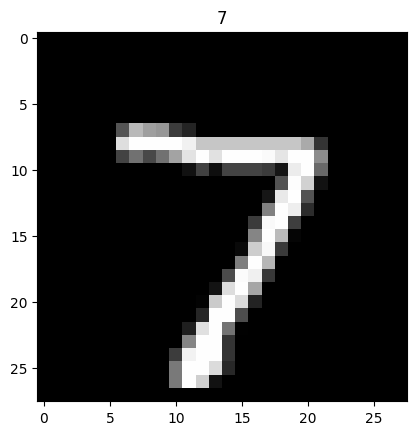

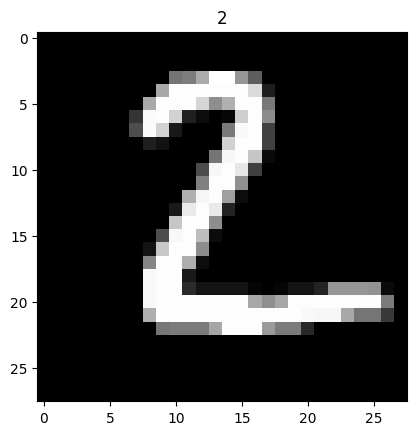

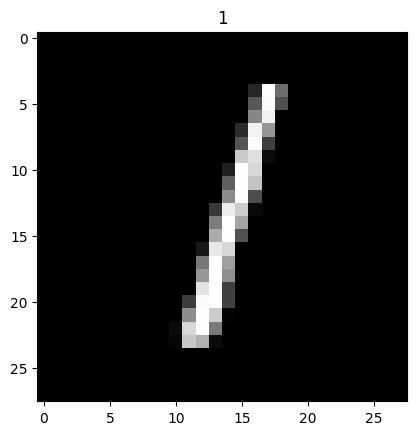

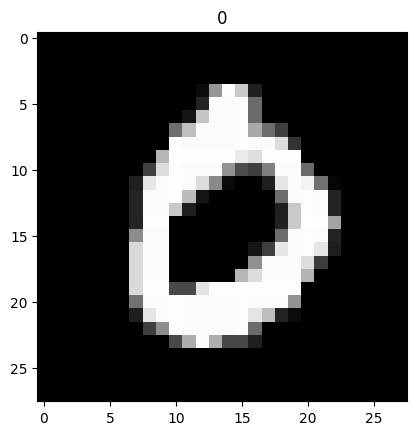

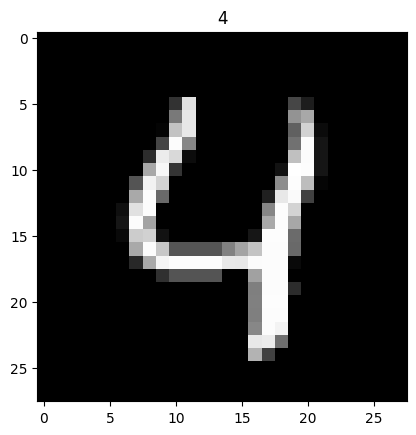

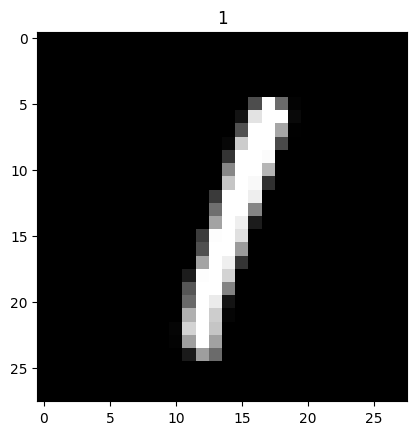

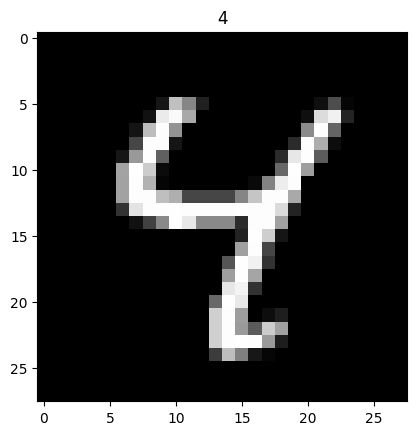

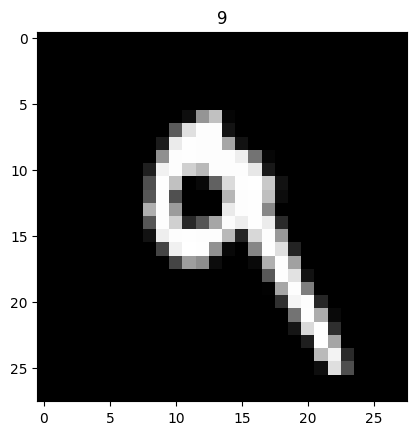

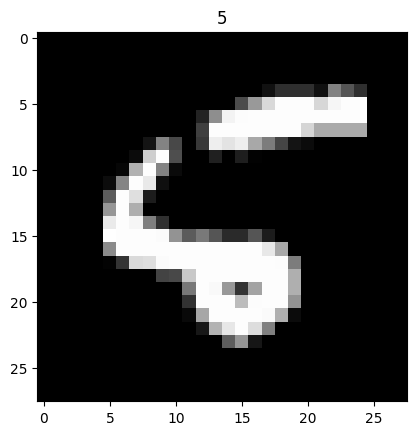

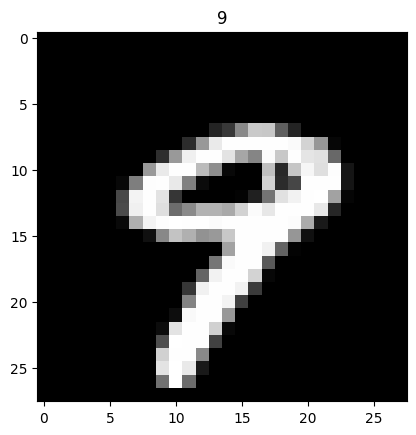

In [ ]:
for idx in range(10):
  plt.title(str(np.argmax(y_pred[idx])))
  plt.imshow(x_test[idx], cmap = 'gray')
  plt.show()

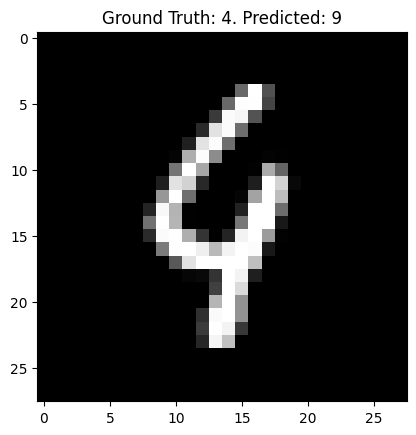

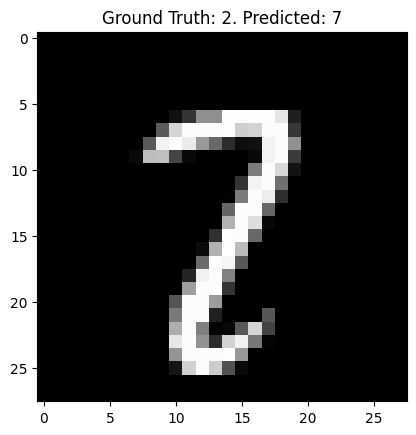

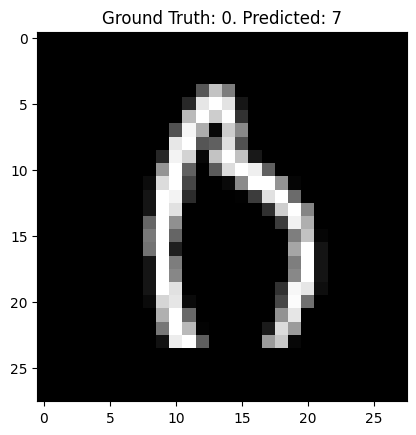

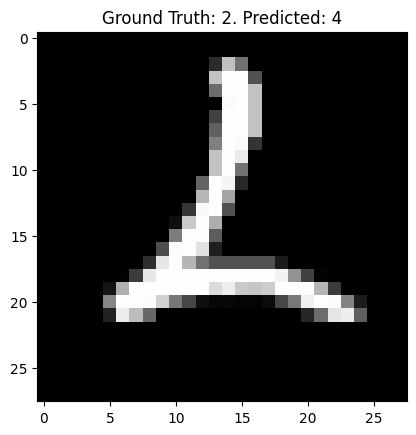

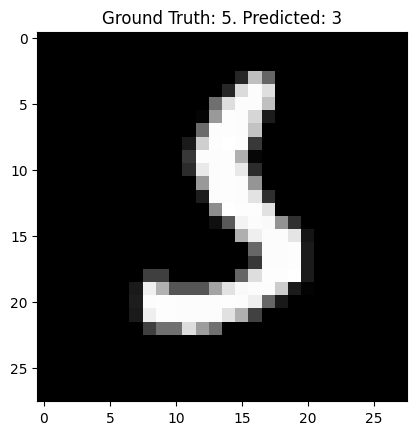

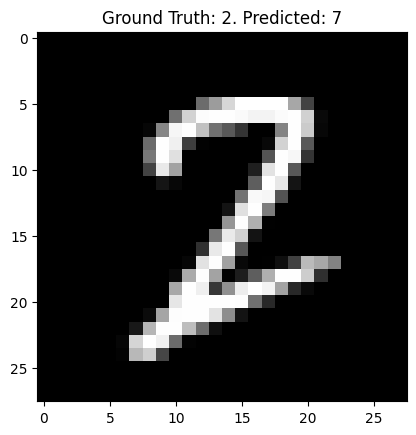

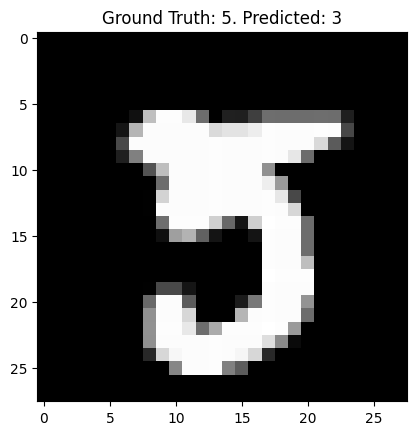

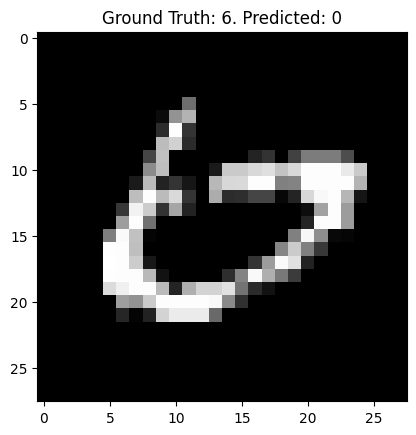

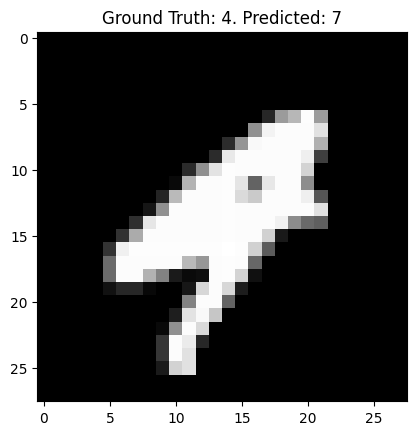

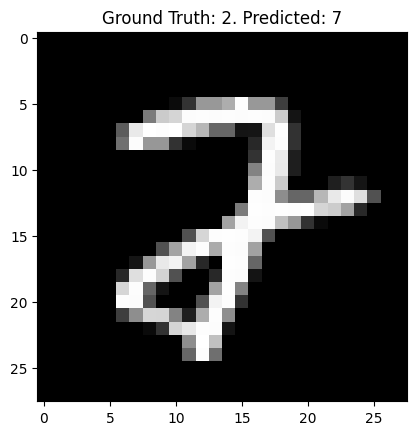

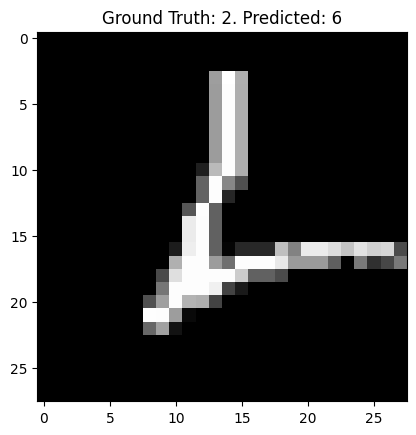

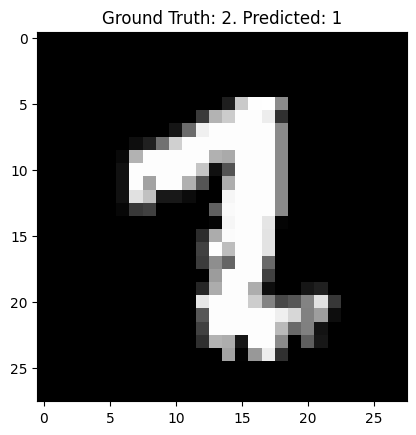

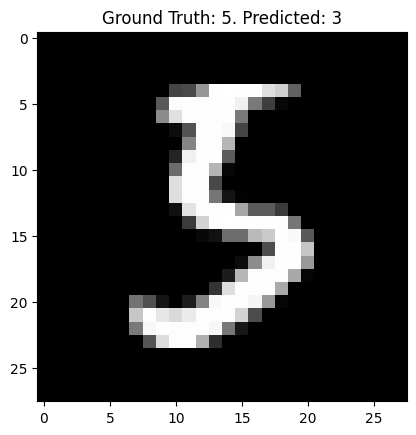

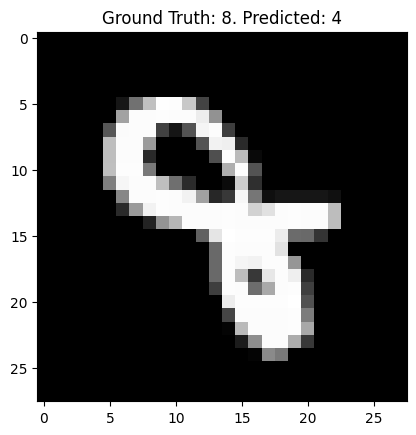

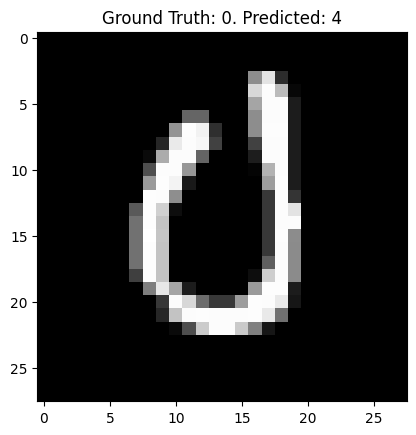

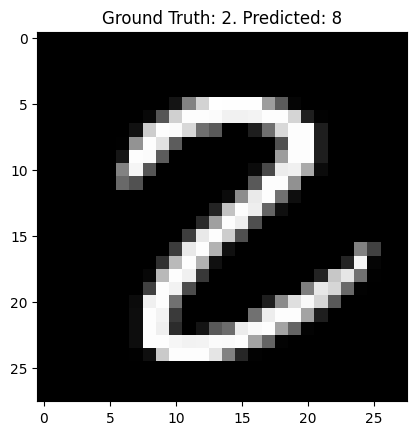

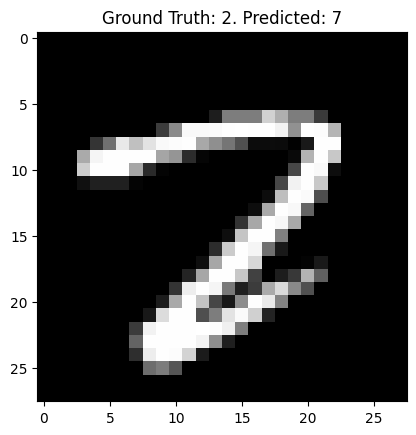

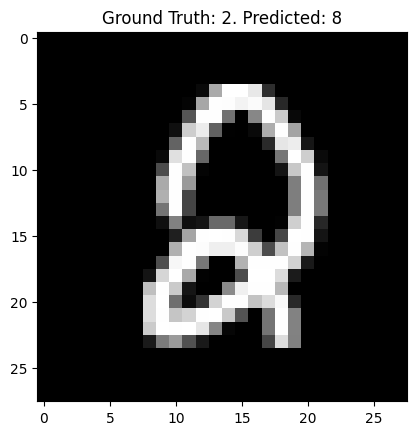

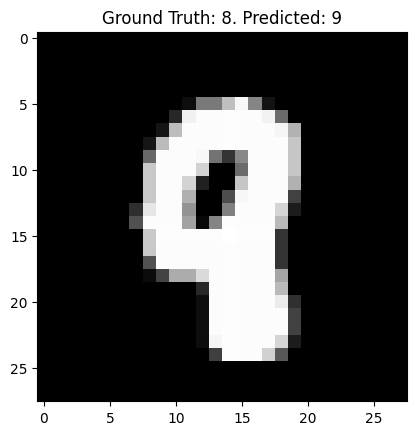

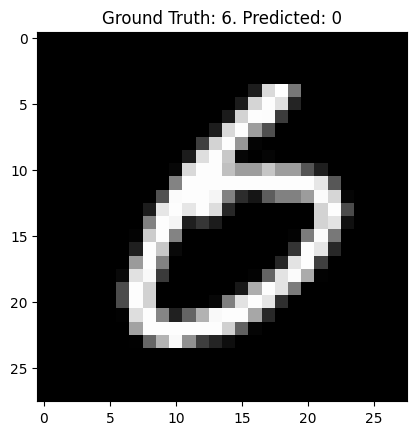

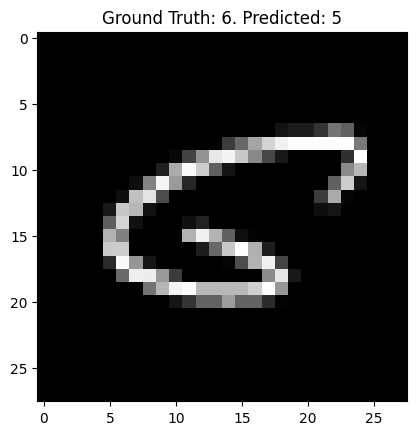

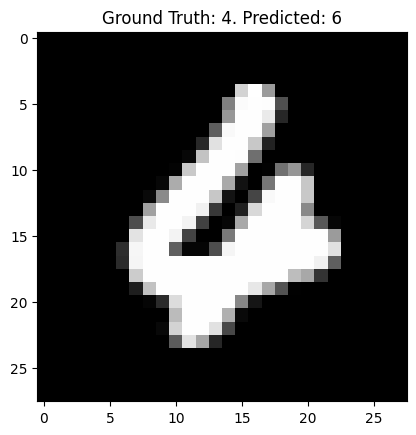

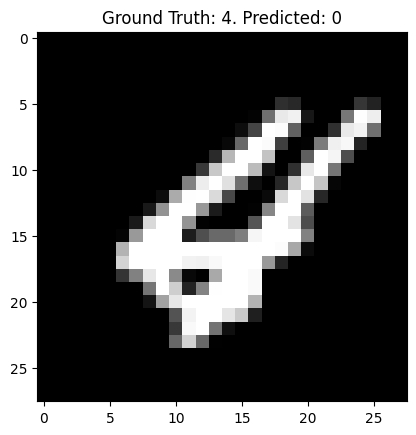

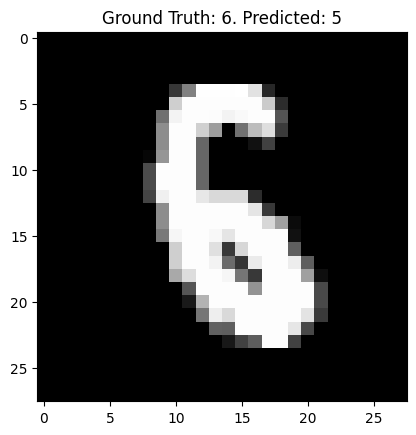

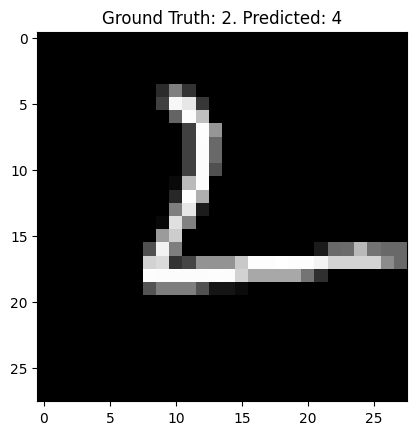

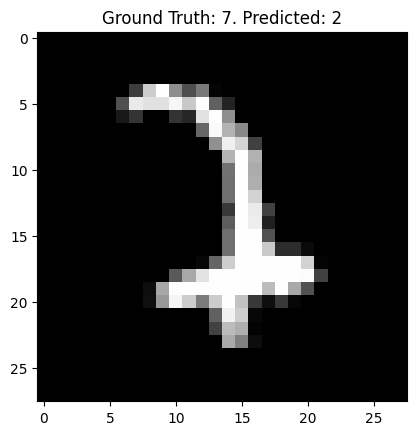

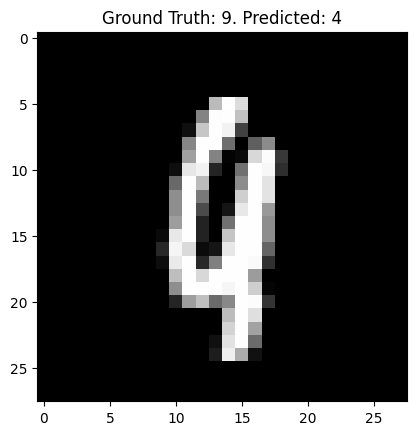

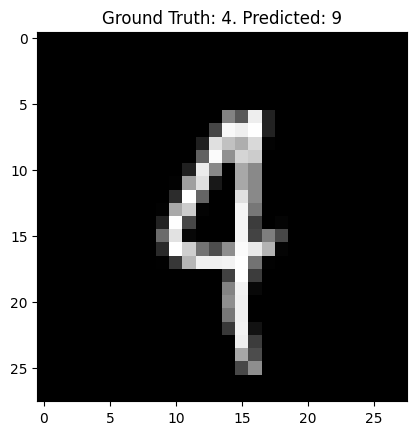

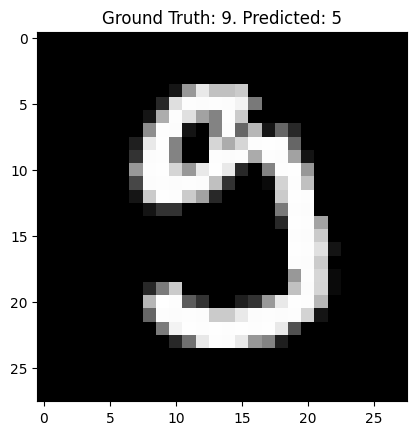

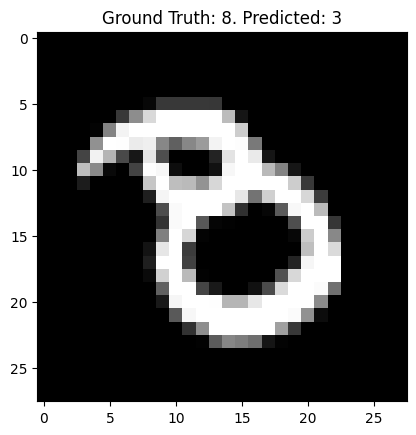

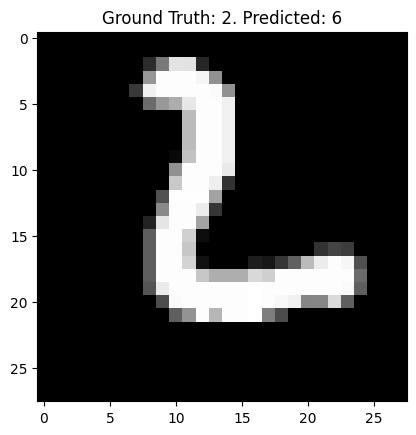

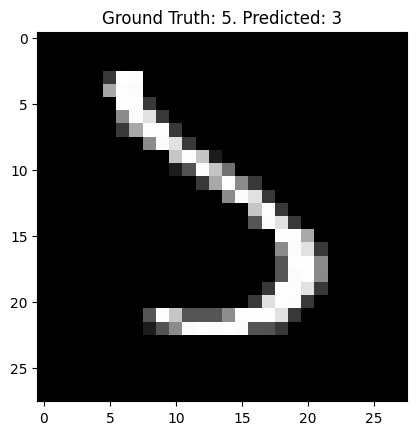

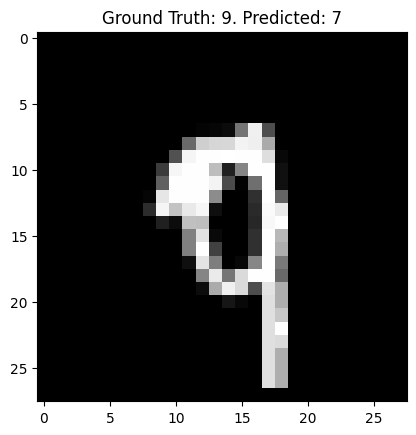

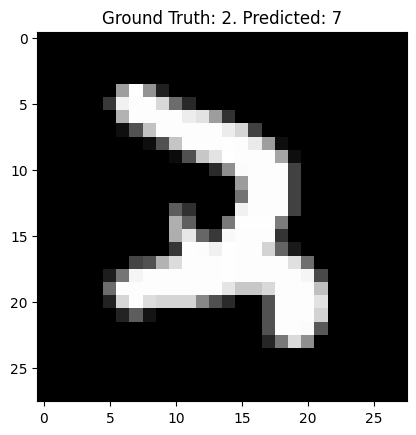

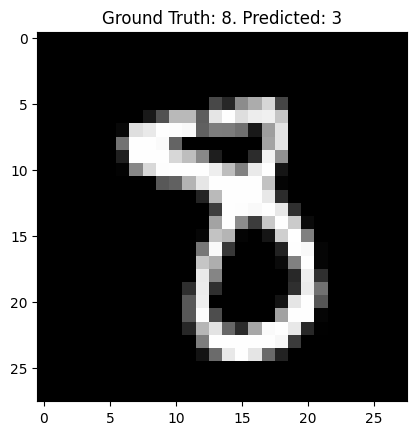

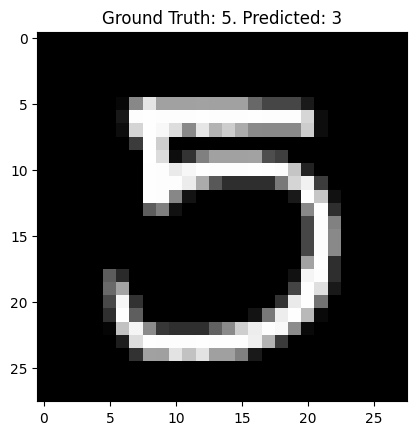

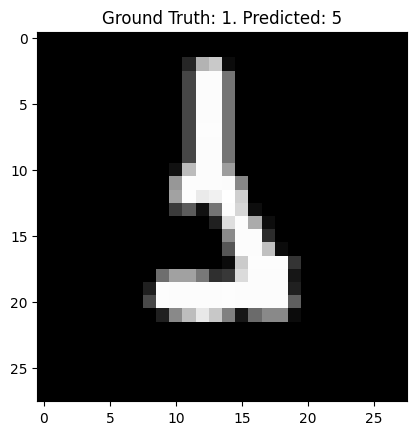

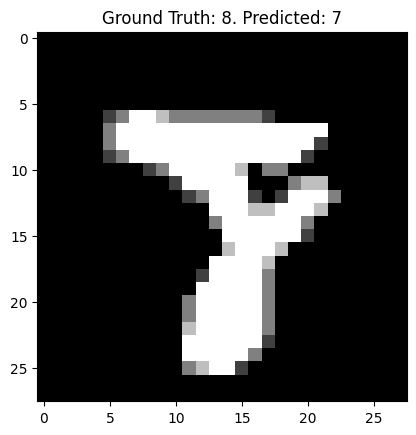

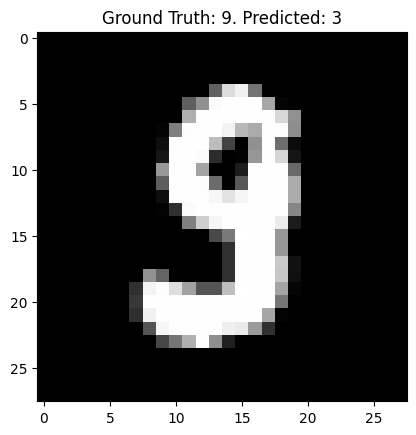

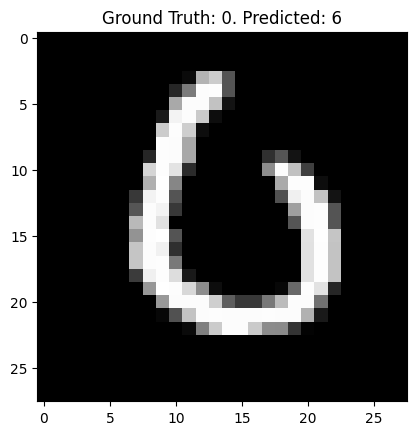

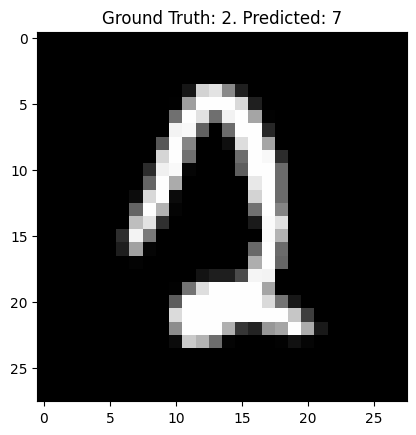

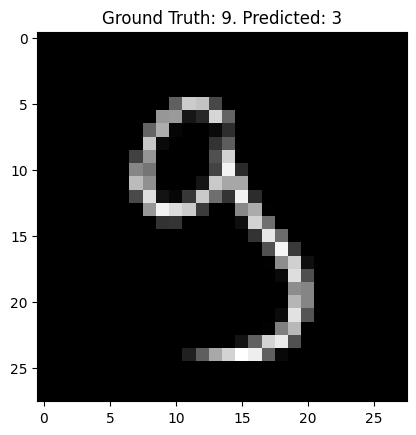

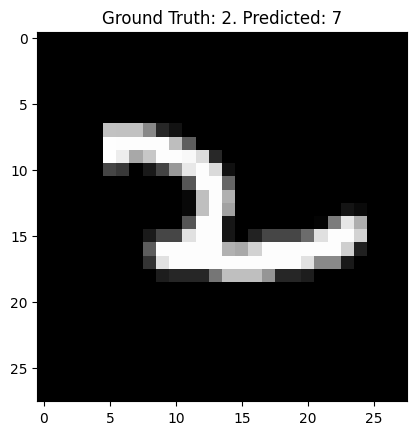

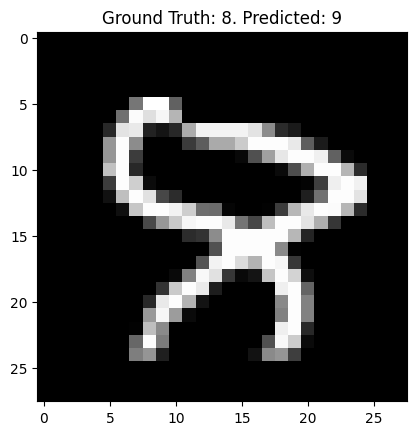

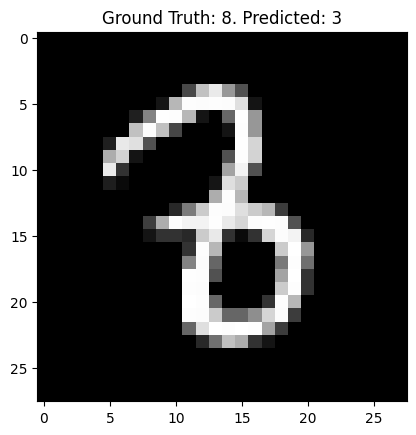

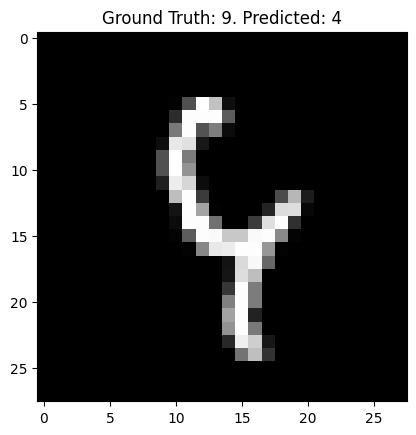

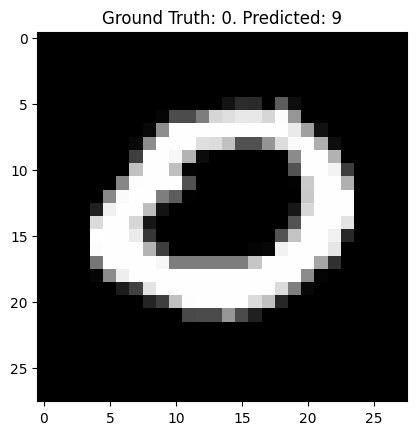

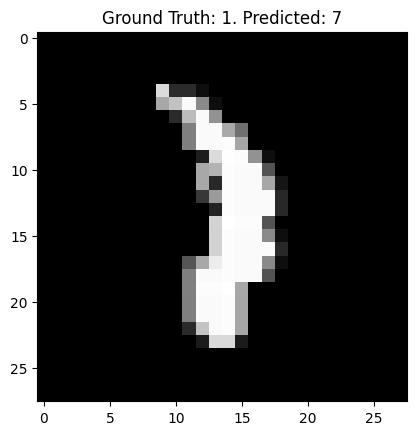

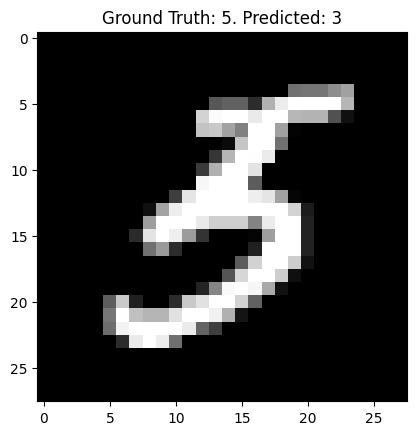

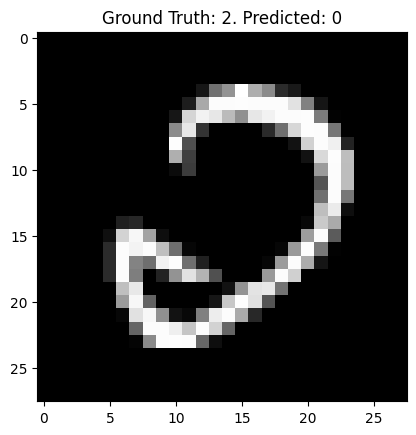

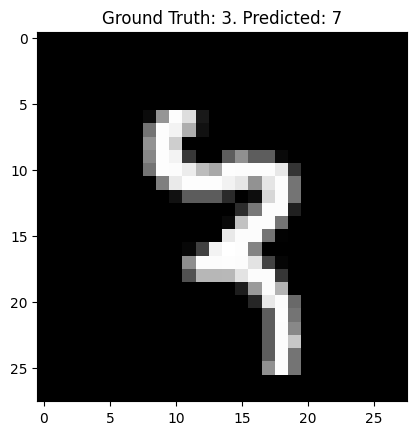

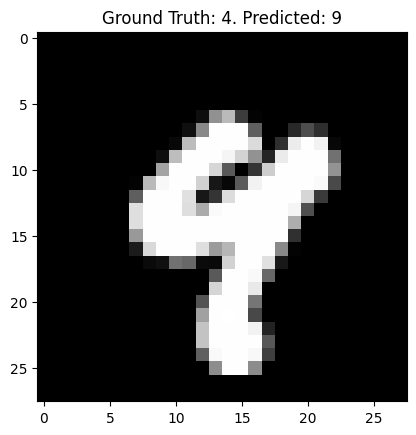

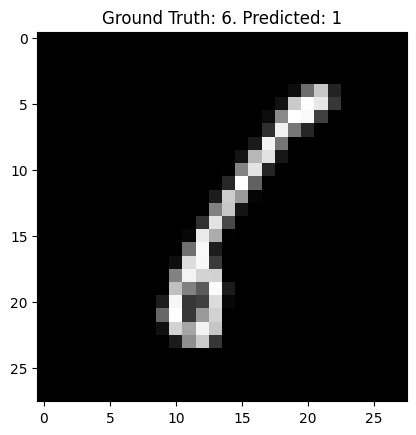

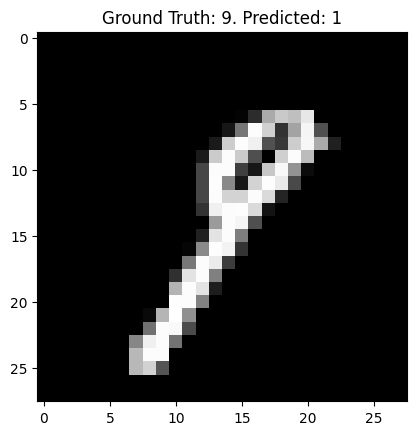

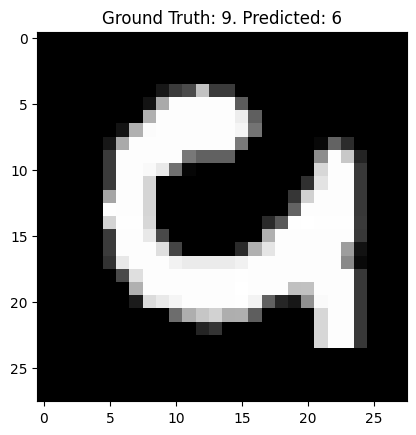

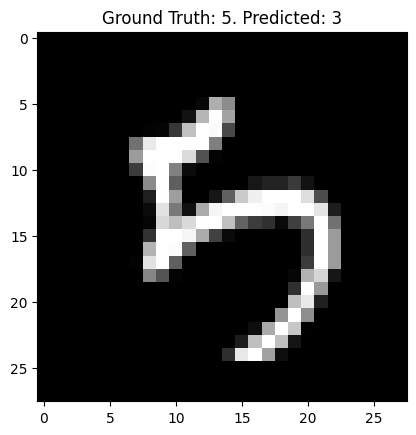

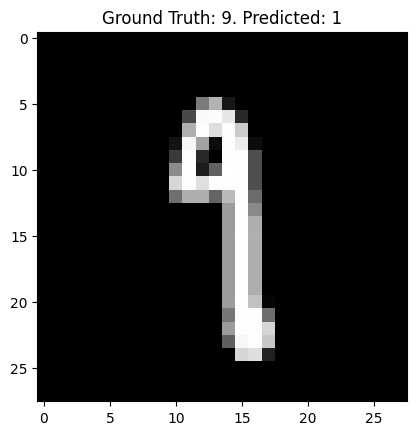

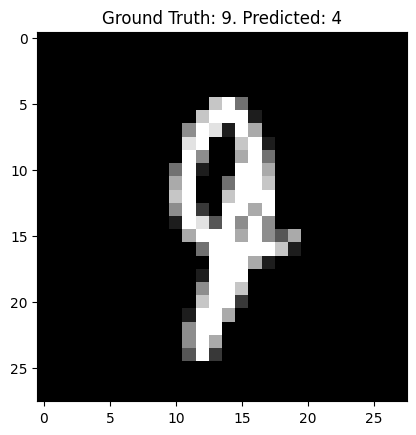

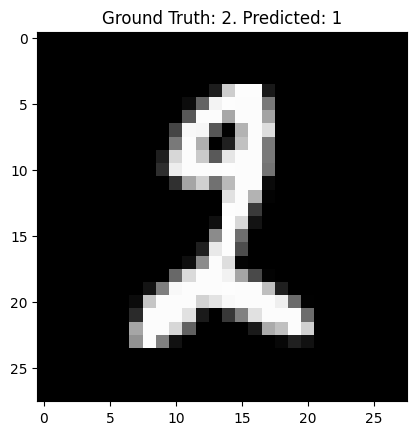

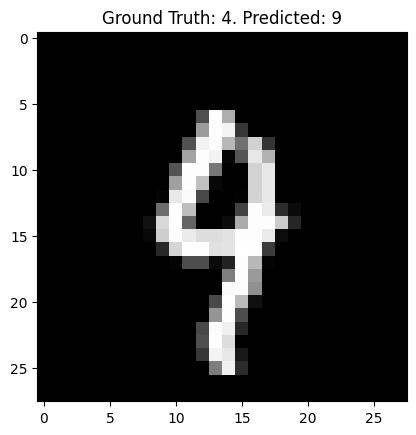

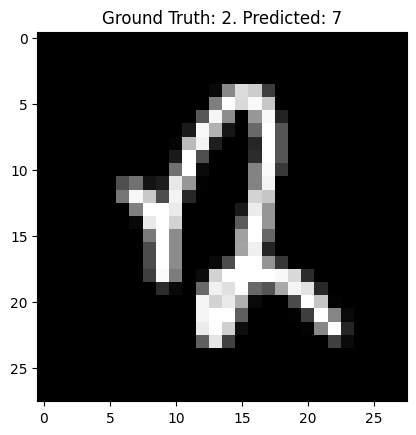

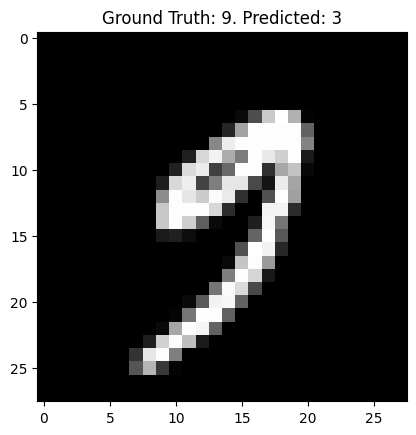

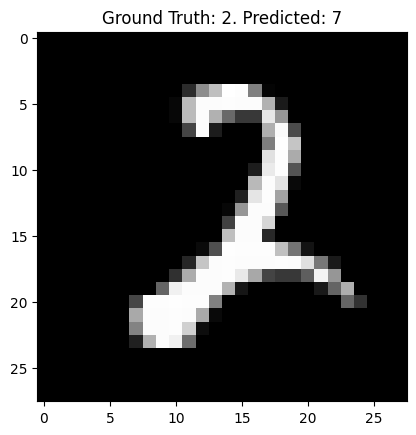

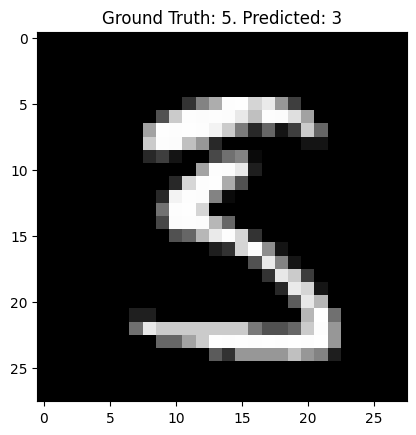

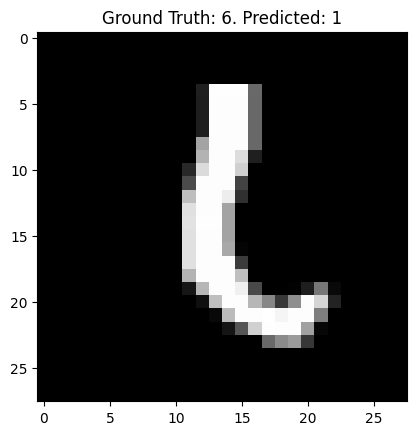

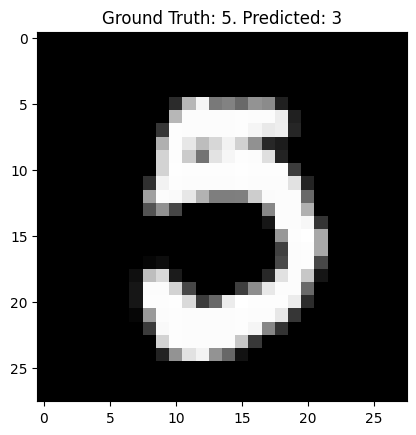

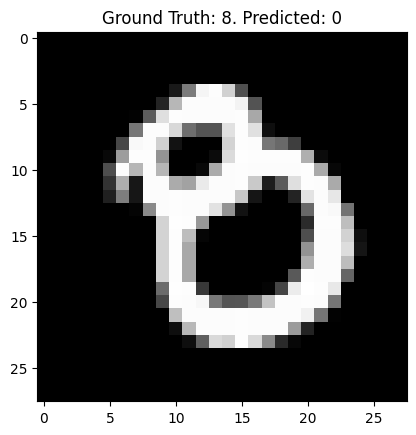

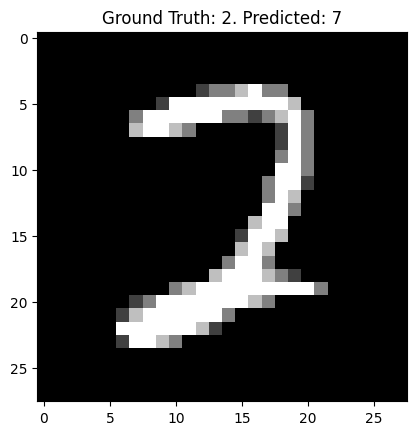

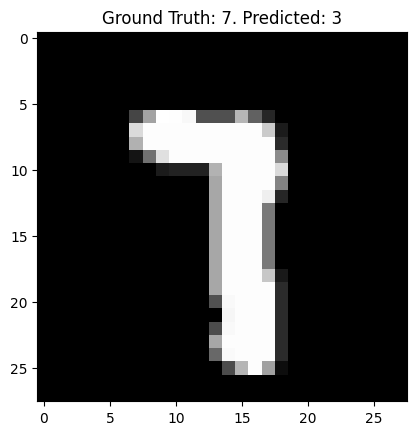

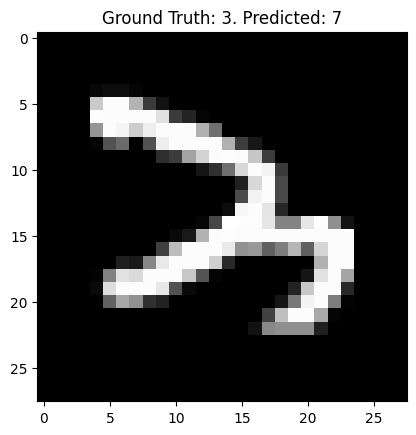

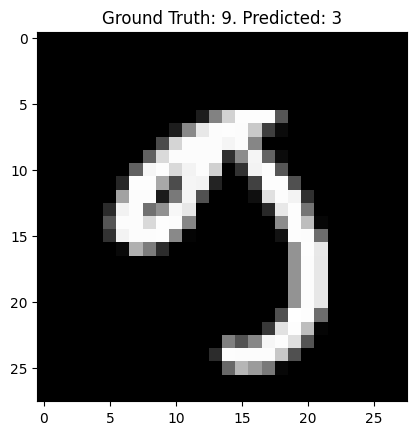

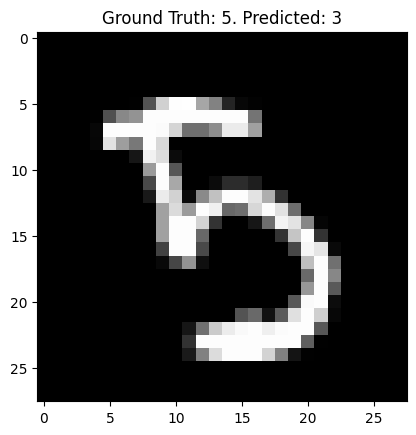

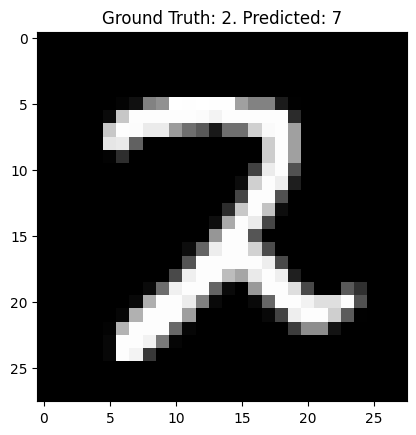

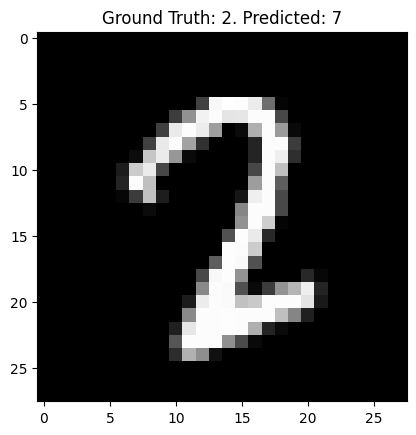

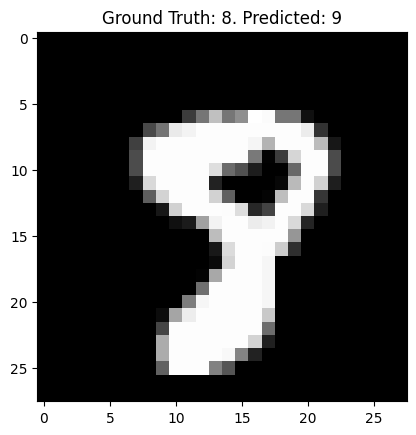

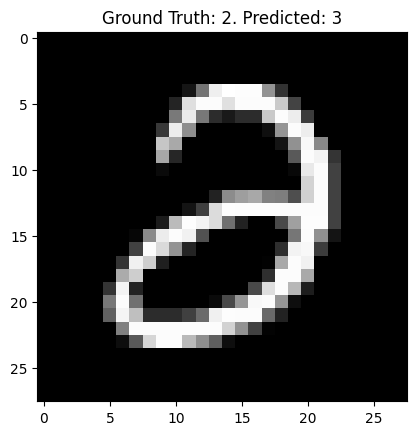

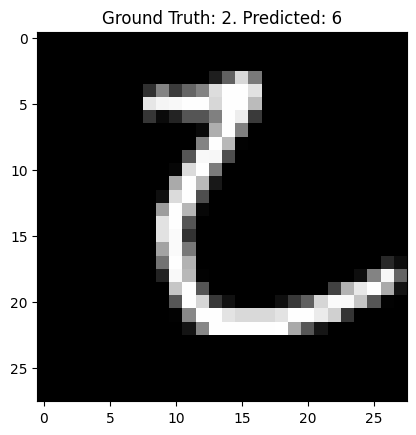

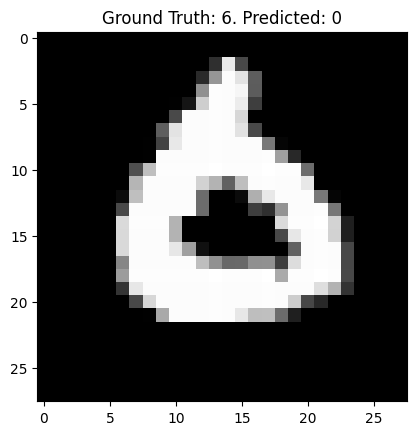

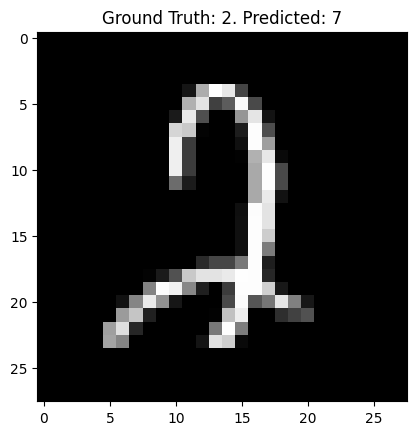

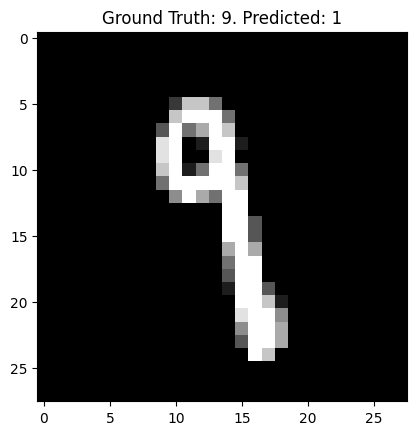

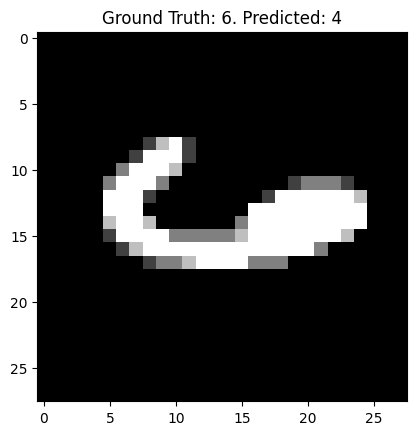

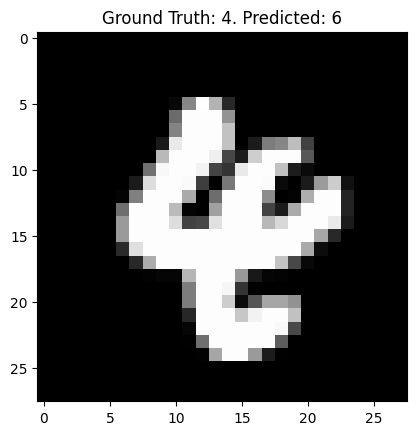

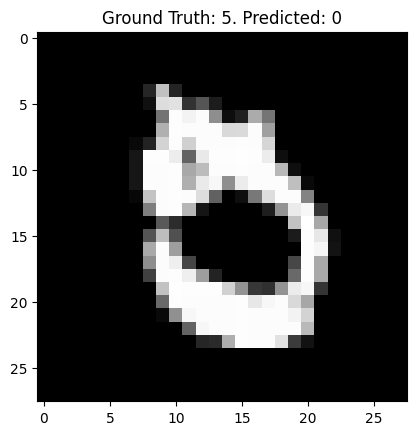

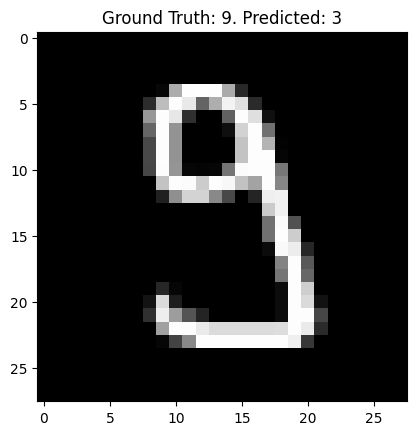

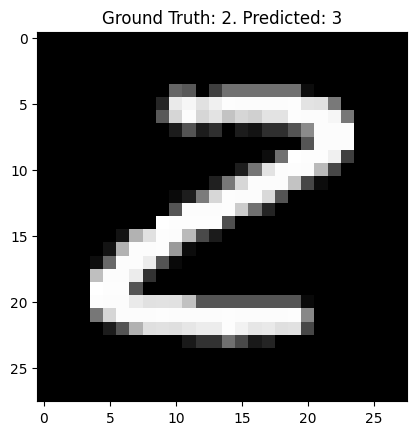

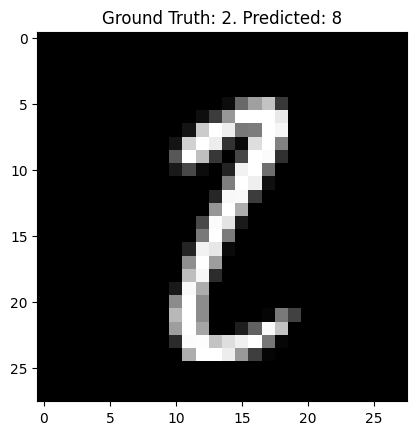

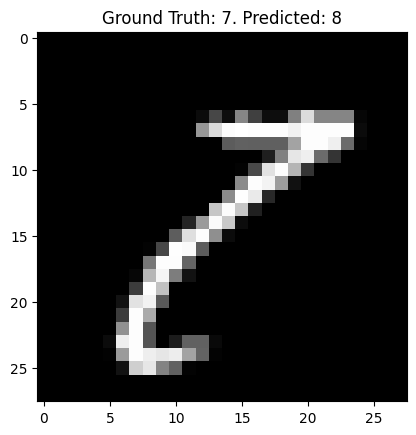

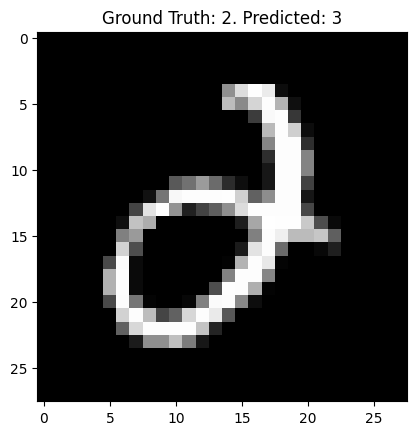

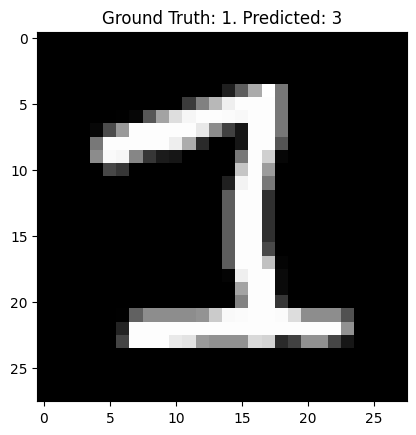

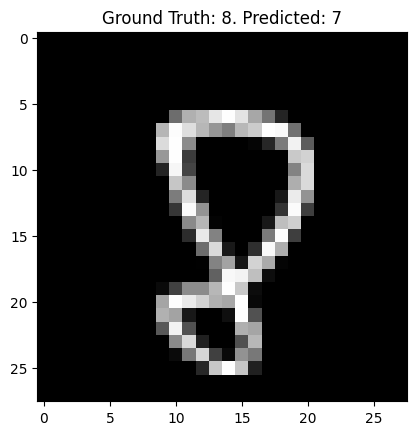

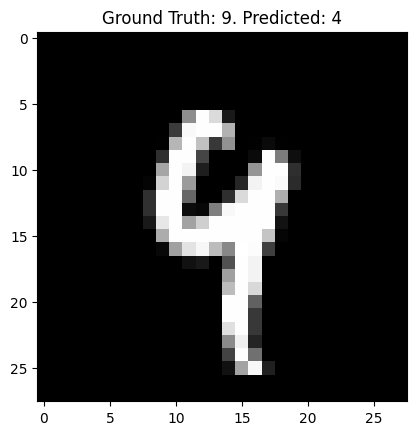

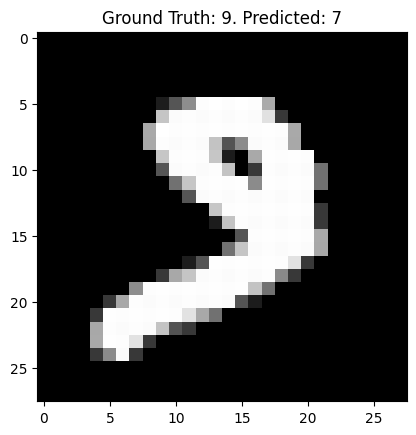

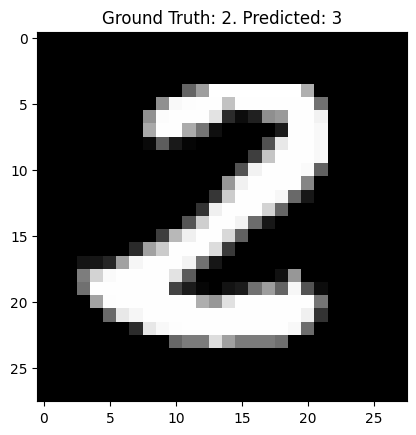

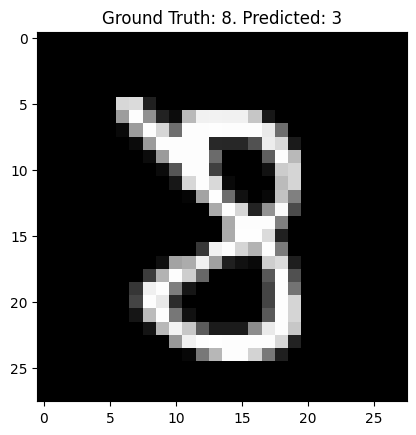

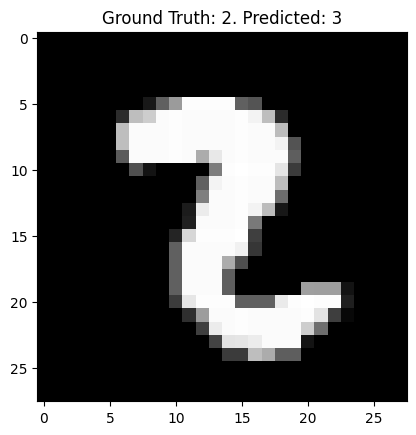

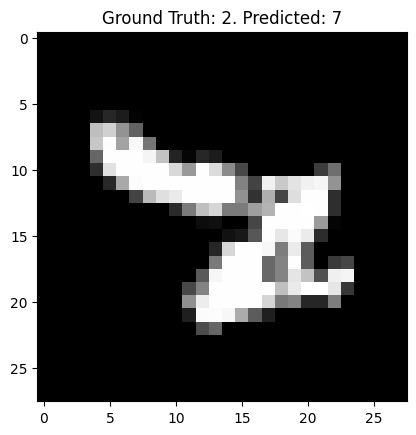

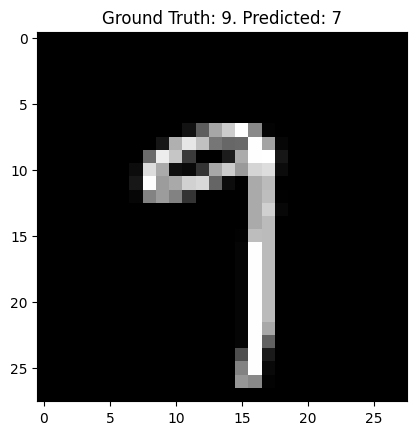

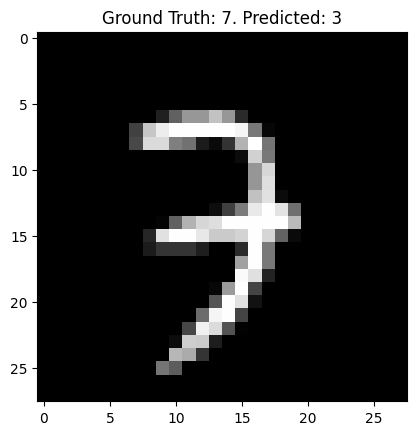

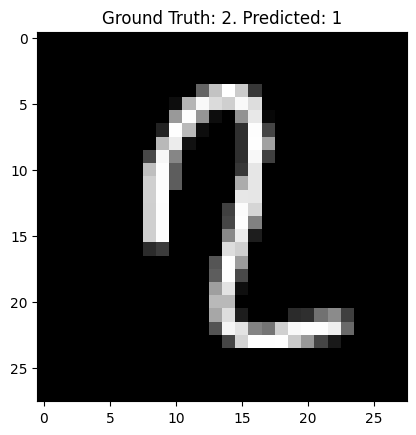

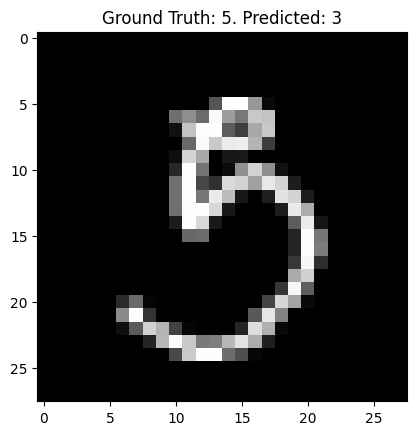

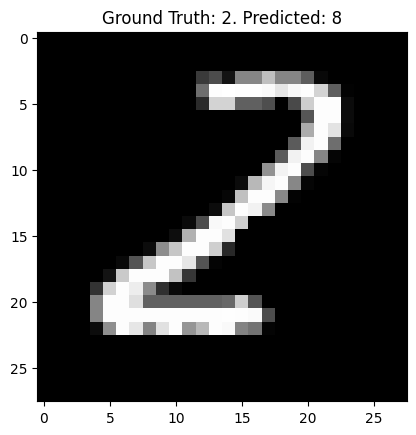

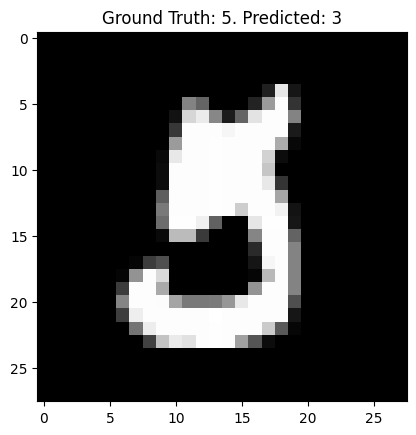

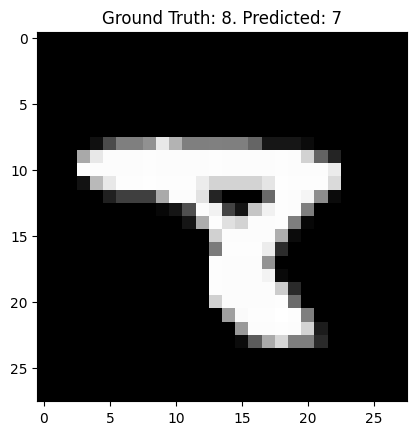

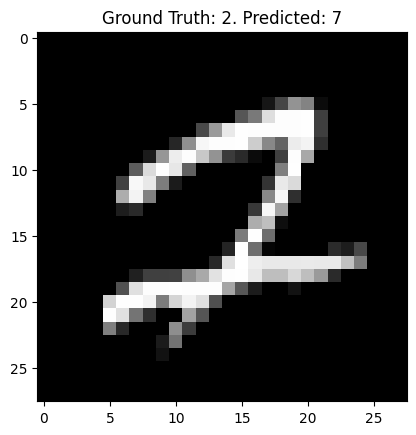

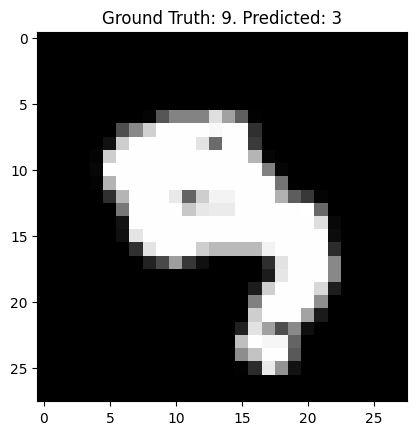

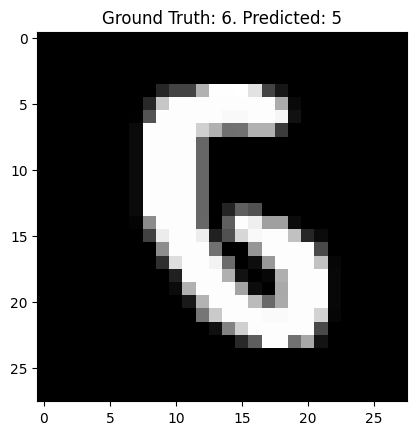

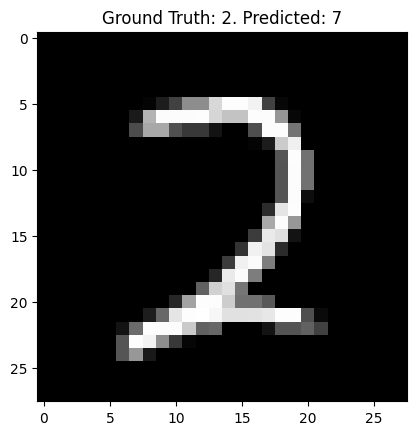

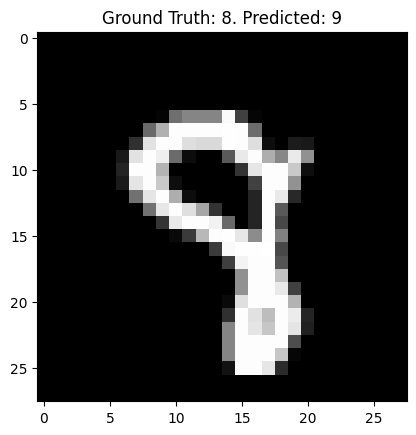

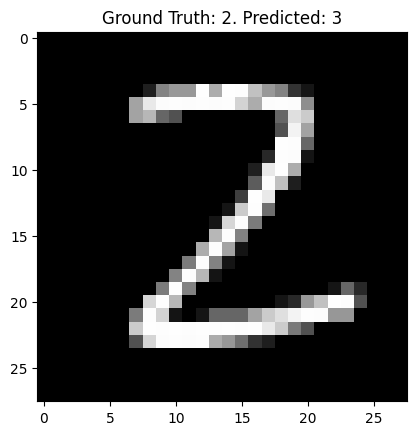

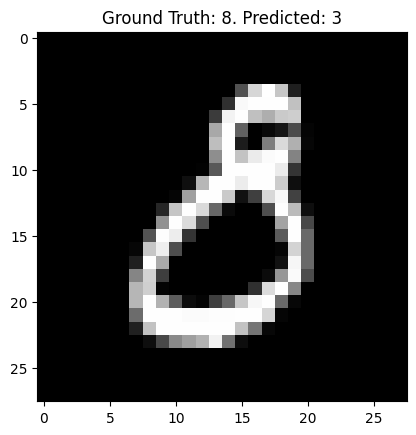

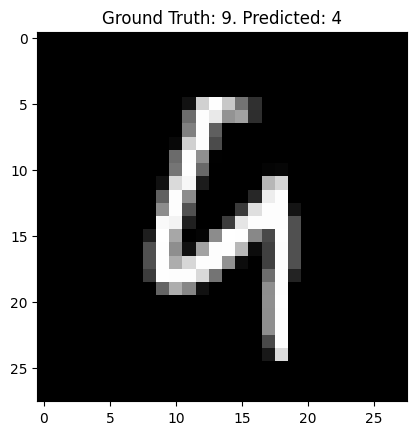

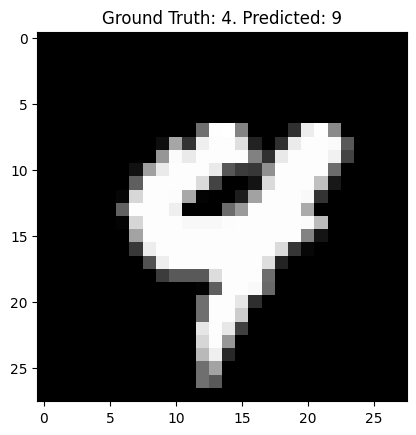

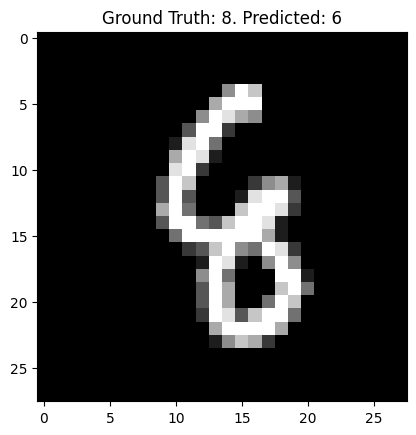

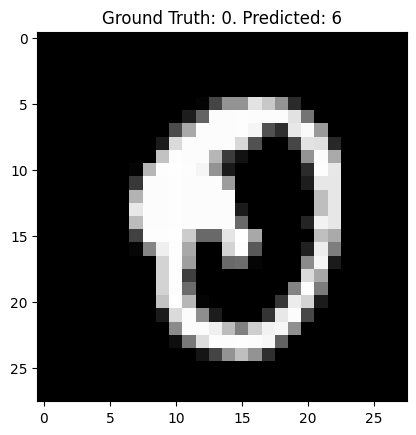

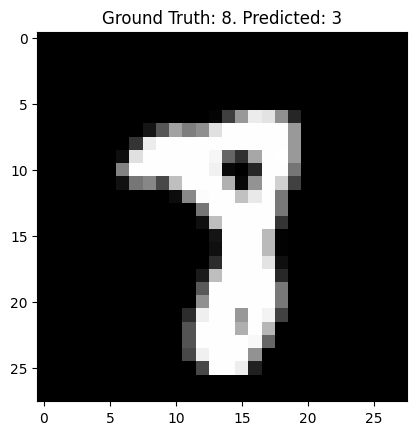

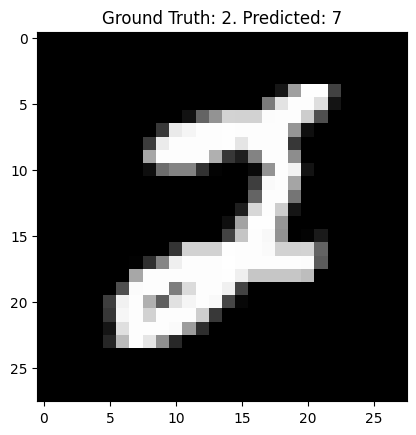

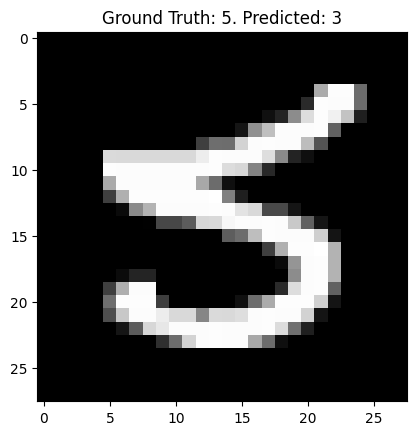

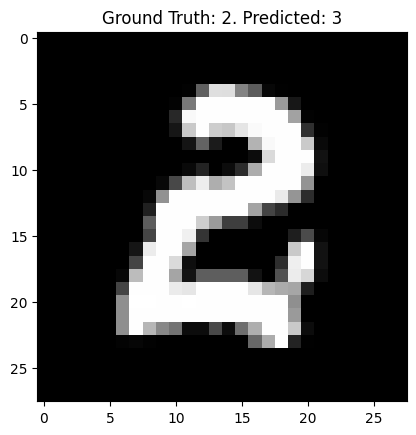

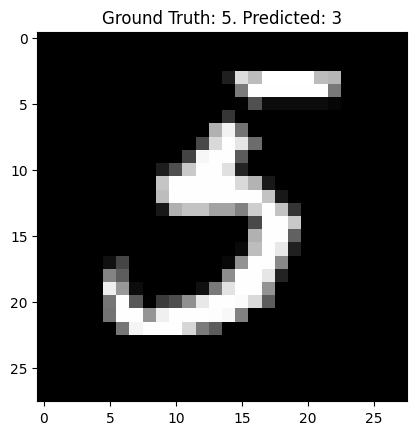

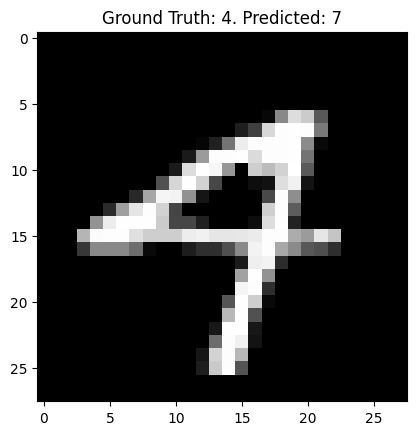

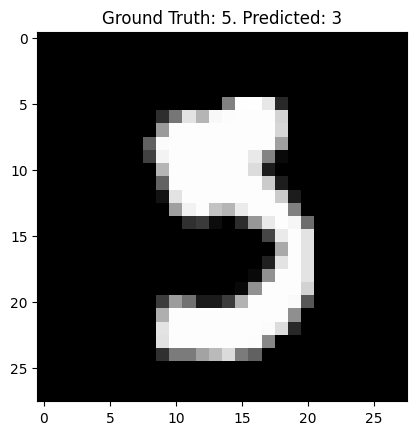

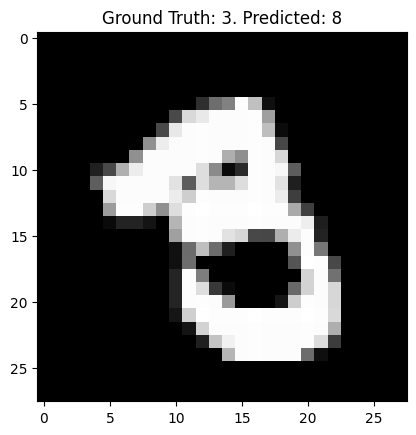

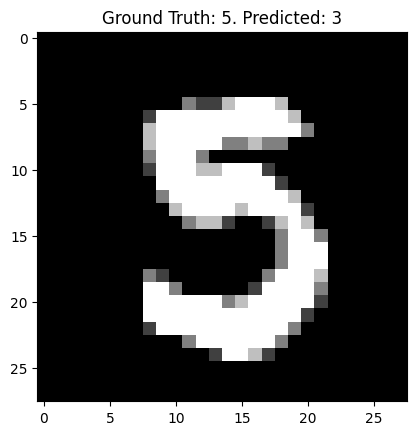

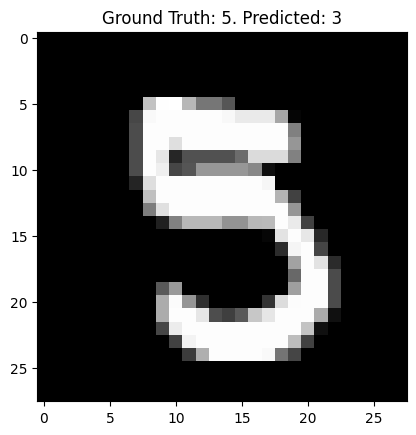

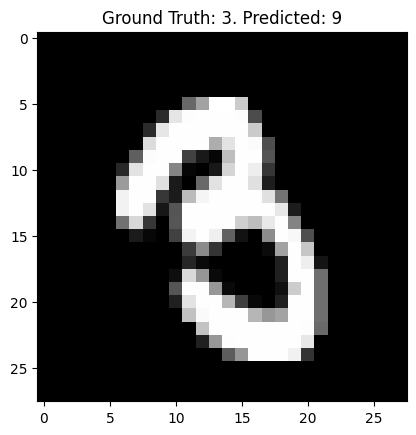

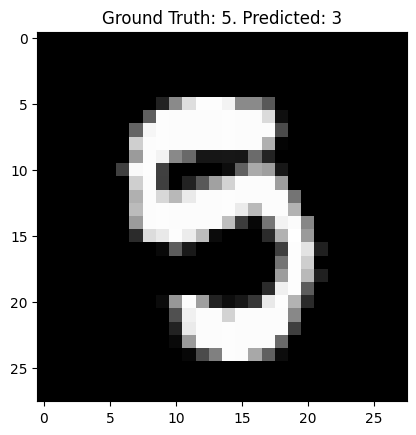

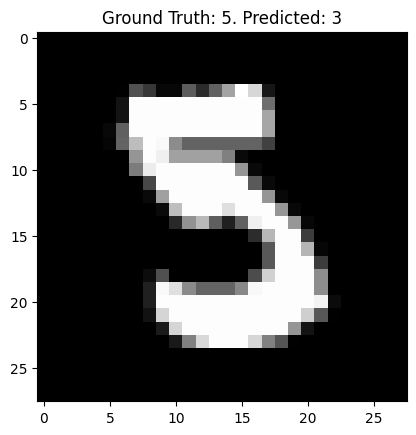

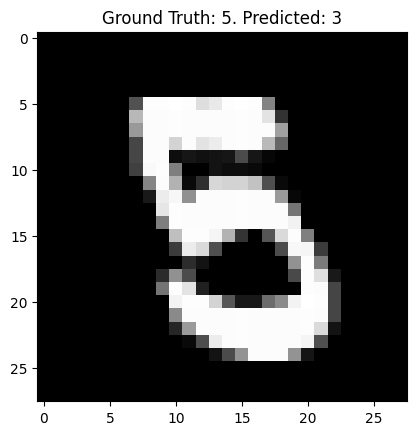

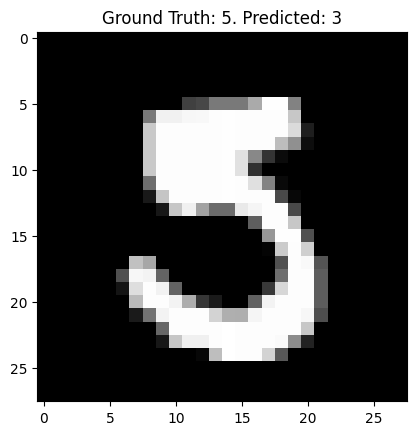

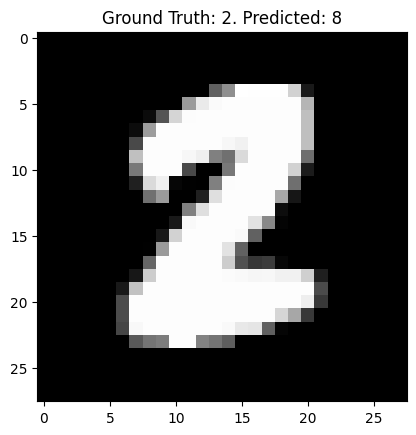

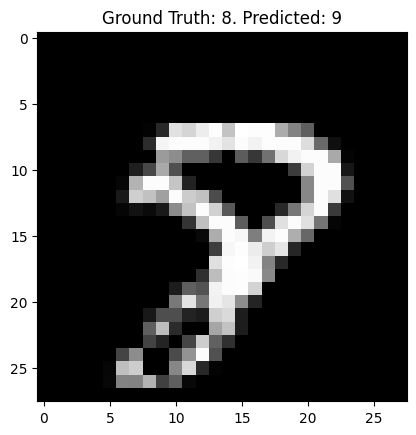

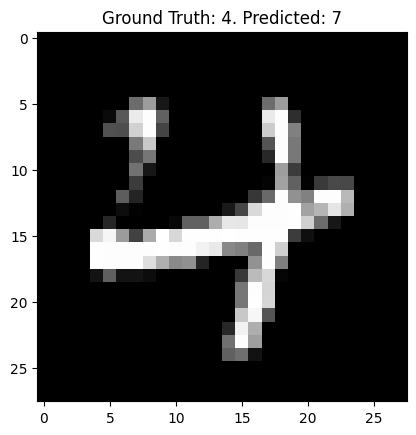

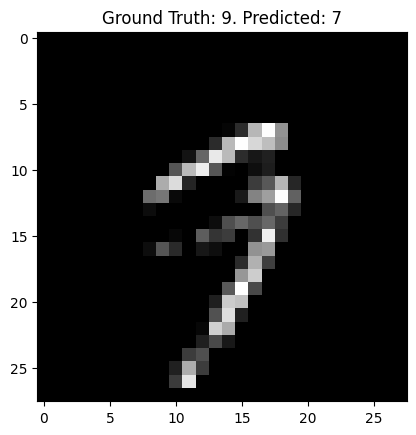

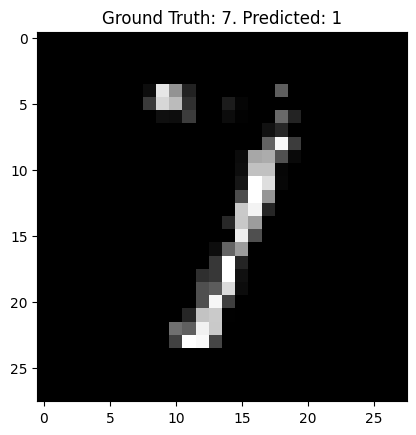

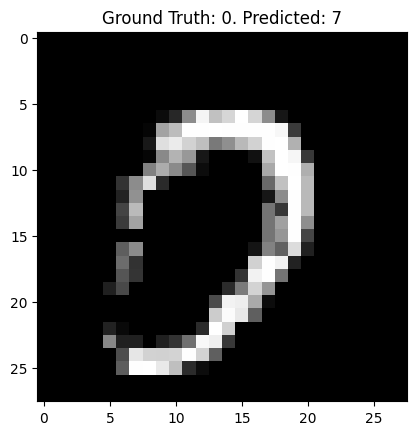

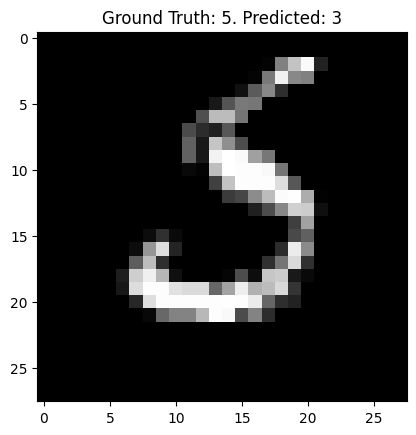

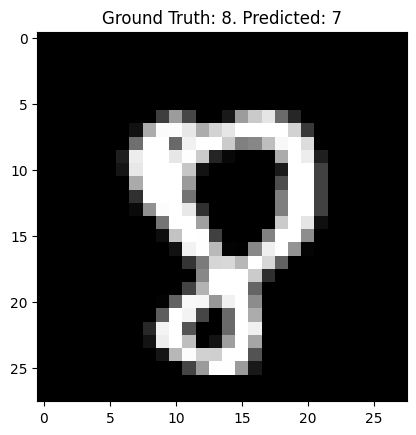

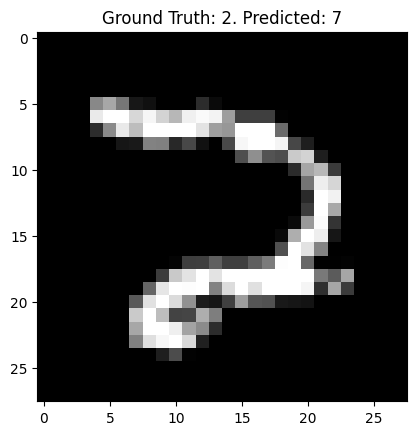

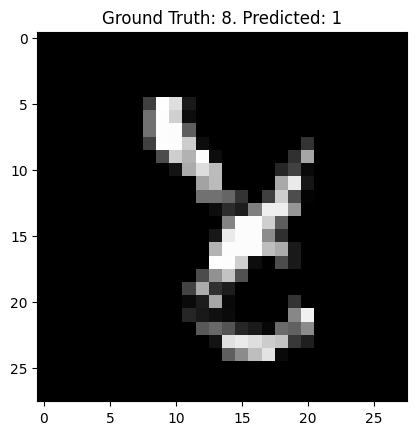

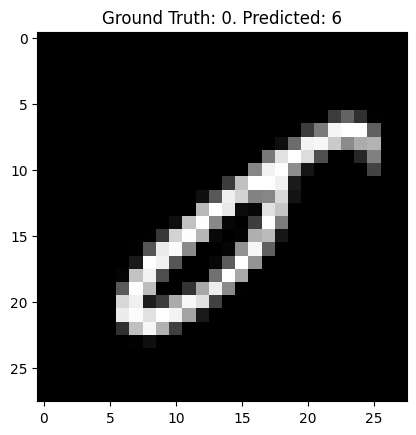

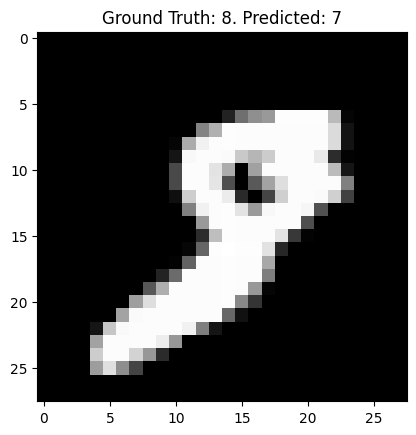

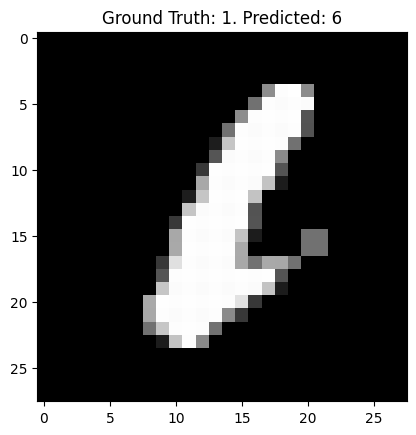

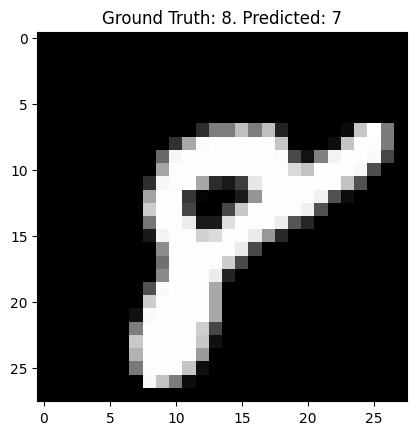

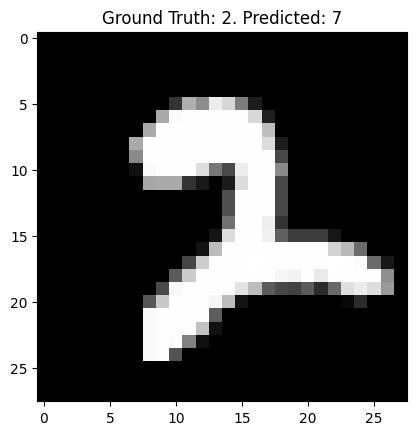

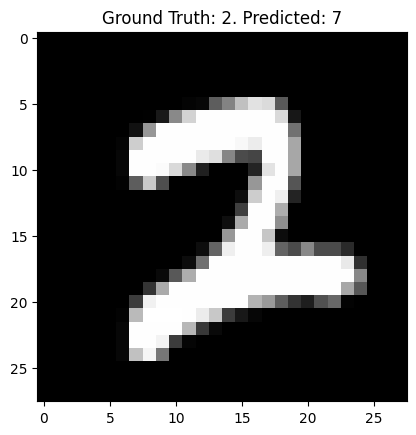

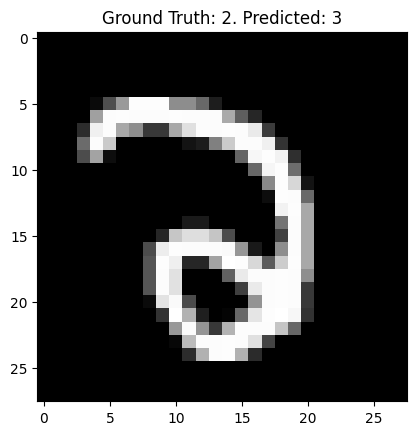

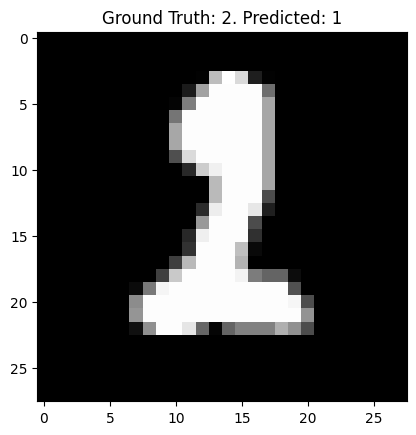

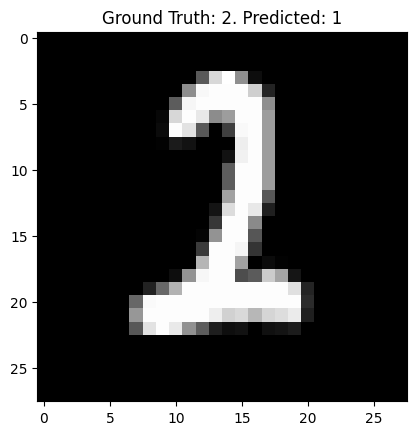

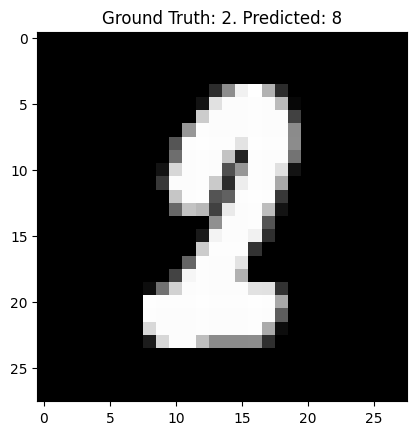

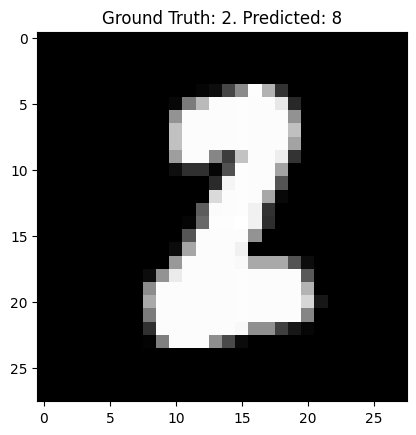

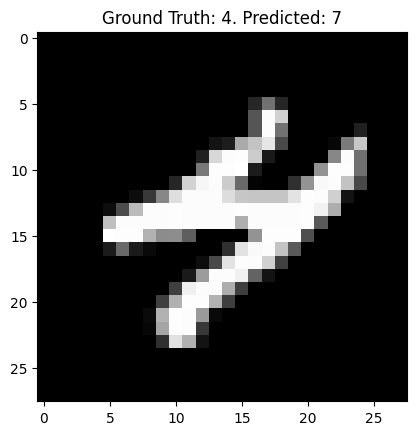

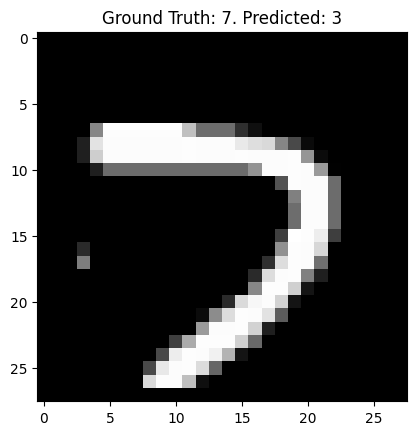

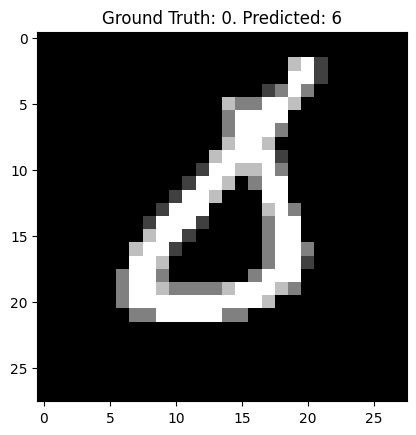

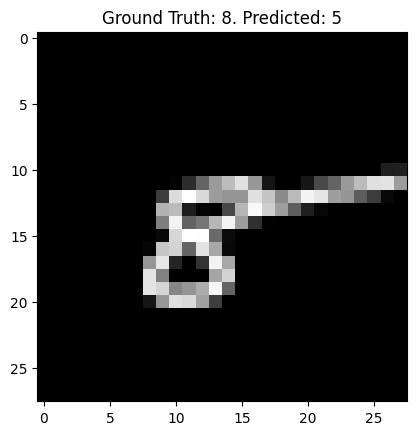

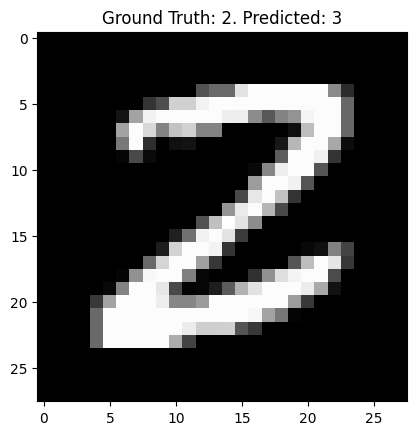

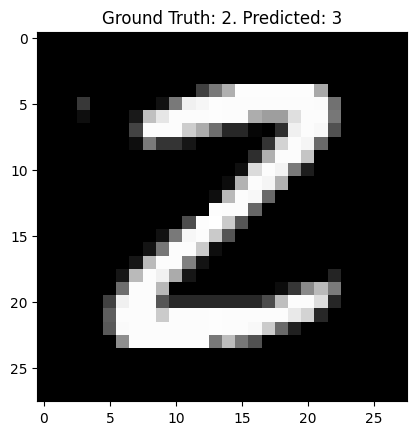

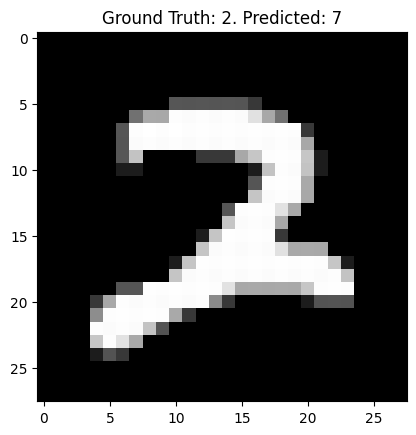

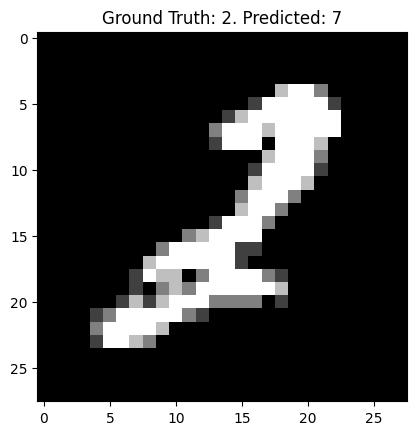

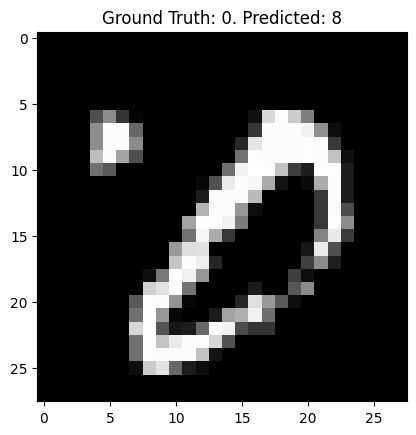

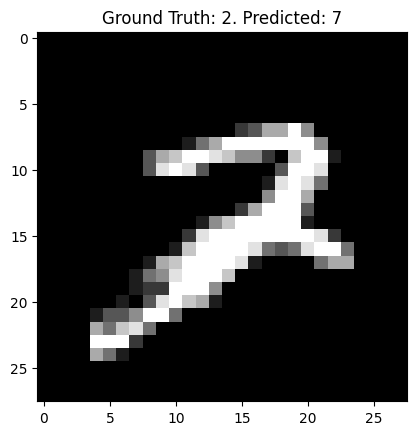

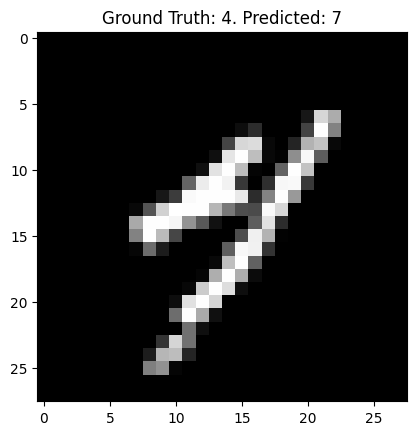

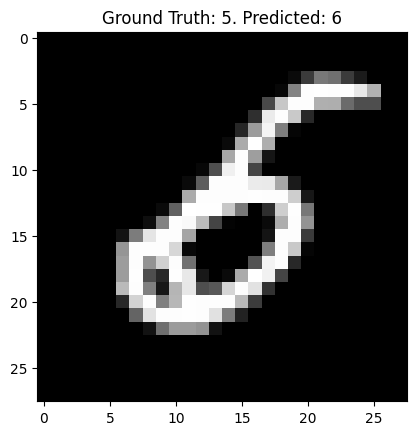

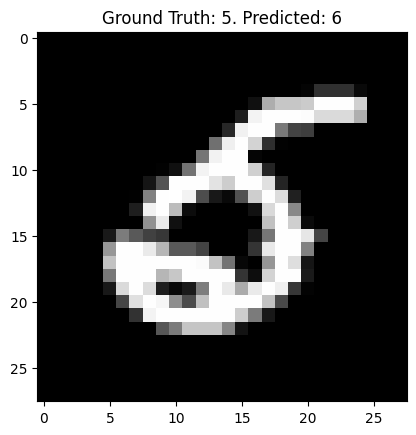

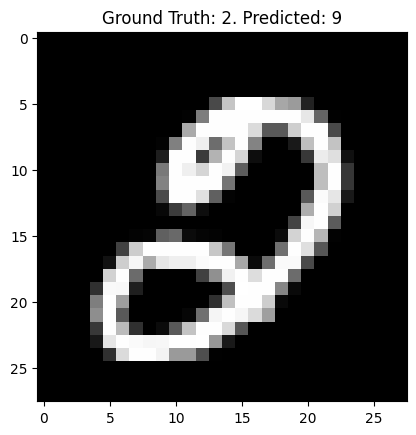

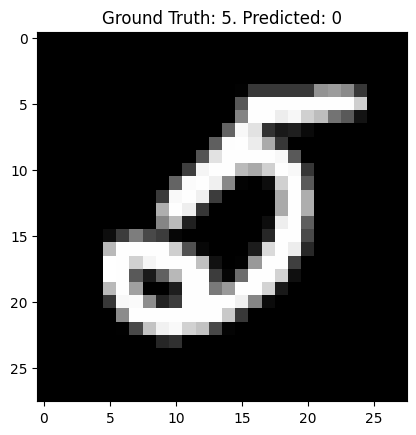

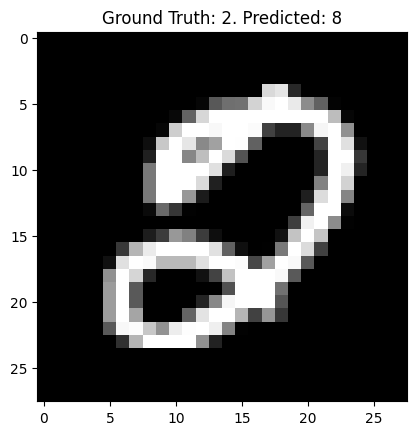

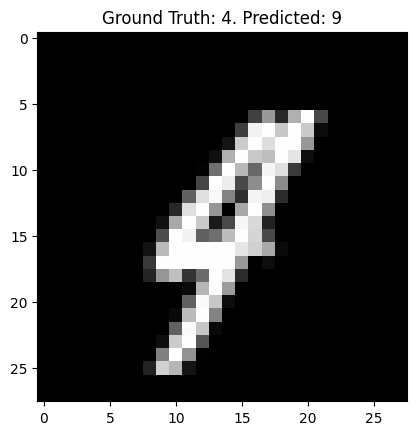

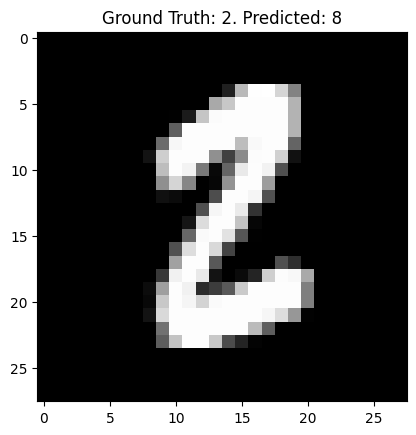

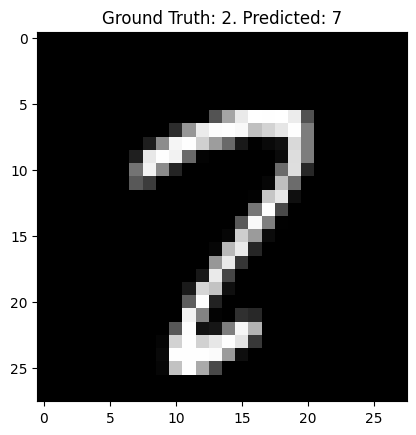

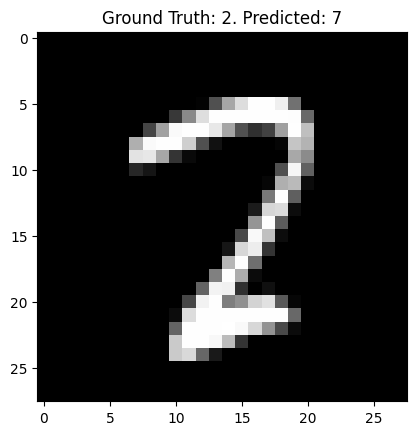

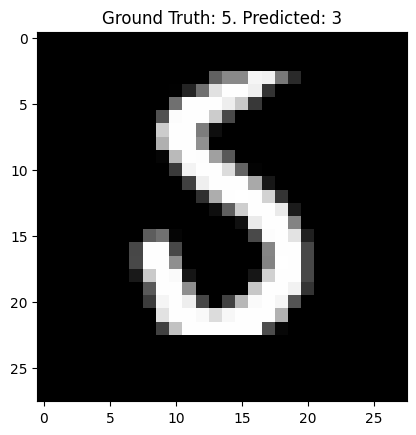

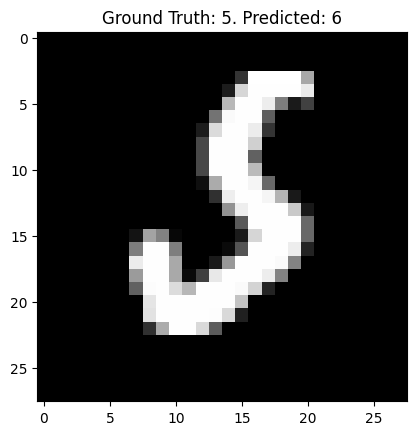

In [ ]:
#틀린 결과 확인하기
for idx in range(len(y_pred)):
  if np.argmax(y_pred[idx]) != np.argmax(y_test[idx]):
    plt.title("Ground Truth: {}. Predicted: {}" .format(str(np.argmax(y_test[idx])), str (np.argmax(y_pred[idx]))))
    plt.imshow(x_test[idx], cmap='gray')
    plt.show()

In [ ]:
from custom_conv2d import MyConv2D

In [ ]:
#직접 Conv2d 만들기
model_custom = Sequential([
    #C1: Convolutional Layer
    MyConv2D(6, kernel_size=(5,5), strides=(1,1), activation='relu', input_shape=(28,28,1), padding='SAME'),
    #S2: Subsampling Layer (Average Pooling)
    AveragePooling2D(pool_size=(2,2), strides=(2,2)),

    #C3: Convolutional Layer
    MyConv2D(6, kernel_size=(5,5), strides=(1,1), activation='relu', padding='VALID'),
    #S4: Subsampling Layer (Average Pooling)
    AveragePooling2D(pool_size=(2,2), strides=(2,2)),

    #C5: Convolutional Layer
    MyConv2D(20, kernel_size=(5,5), strides=(1,1), activation='relu', padding='VALID'),
    Flatten(),

    #F6: Fully Connected Layer
    Dense(84, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

#모델 컴파일
model_custom.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#모델 학습
model_custom.fit(x_train, y_train, batch_size = 128, epochs=10, validation_split=0.1)
#모델 평가
test_loss, test_accuracy = model_custom.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy: .3f}')

Epoch 1/10
422/422 [==============================] - 6s 10ms/step - loss: 0.6090 - accuracy: 0.8064 - val_loss: 0.2108 - val_accuracy: 0.9362
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 0.2073 - accuracy: 0.9364 - val_loss: 0.1293 - val_accuracy: 0.9642
Epoch 3/10
422/422 [==============================] - 2s 5ms/step - loss: 0.1453 - accuracy: 0.9555 - val_loss: 0.1051 - val_accuracy: 0.9688
Epoch 4/10
422/422 [==============================] - 2s 5ms/step - loss: 0.1172 - accuracy: 0.9639 - val_loss: 0.0860 - val_accuracy: 0.9752
Epoch 5/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0965 - accuracy: 0.9704 - val_loss: 0.0780 - val_accuracy: 0.9773
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0853 - accuracy: 0.9736 - val_loss: 0.0727 - val_accuracy: 0.9793
Epoch 7/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0777 - accuracy: 0.9759 - val_loss: 0.0784 - val_accuracy: 0.9773
Epoch

In [ ]:
#ResNet34
def residual_block(x, filters, stride=1):
    shortcut = x

    # 첫 번째 컨볼루션
    x = Conv2D(filters, 3, padding='same', strides=stride)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # 두 번째 컨볼루션
    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization()(x)

    # shortcut 연결
    if stride != 1 or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, 1, strides=stride)(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

def build_resnet34(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # 초기 컨볼루션 레이어
    x = Conv2D(64, 7, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(3, strides=2, padding='same')(x)

    # Residual 블록
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 128)
    x = residual_block(x, 128)
    x = residual_block(x, 128)
    x = residual_block(x, 256, stride=2)
    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 512, stride=2)
    x = residual_block(x, 512)
    x = residual_block(x, 512)

    # 평균 풀링 및 밀집층
    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)

    # 모델 구성
    model = Model(inputs=inputs, outputs=x)
    return model

In [ ]:
# 직접 ResNet18 만들기
def residual_block(x, filters, stride=1):
    shortcut = x

    # 첫 번째 컨볼루션
    x = Conv2D(filters, 3, padding='same', strides=stride)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # 두 번째 컨볼루션
    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization()(x)

    # shortcut 연결
    if stride != 1 or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, 1, strides=stride)(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

def build_resnet18(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # 초기 컨볼루션 레이어
    x = Conv2D(64, 7, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(3, strides=2, padding='same')(x)

    # Residual 블록
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 128)
    x = residual_block(x, 256, stride=2)
    x = residual_block(x, 256)
    x = residual_block(x, 512, stride=2)
    x = residual_block(x, 512)

    # 평균 풀링 및 밀집층
    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)

    # 모델 구성
    model = Model(inputs=inputs, outputs=x)
    return model

In [ ]:
from tensorflow.keras.datasets import cifar10
# 데이터셋 로드 및 전처리

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32')/ 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 모델 생성
model = build_resnet18((32,32,3), 10)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# 모델 요약
model.summary()
# 모델 학습
model.fit(x_train, y_train, batch_size = 64, epochs = 10, validation_data = (x_test, y_test))

#모델 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy:  {test_accuracy: .3f}')

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, 16, 16, 64)           9472      ['input_2[0][0]']             
                                                                                                  
 batch_normalization_20 (Ba  (None, 16, 16, 64)           256       ['conv2d_26[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 re_lu_17 (ReLU)             (None, 16, 16, 64)           0         ['batch_normalization_20

In [ ]:
from tensorflow.keras.datasets import cifar10
# 데이터셋 로드 및 전처리

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32')/ 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 모델 생성
model = build_resnet34((32,32,3), 10)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# 모델 요약
model.summary()
# 모델 학습
model.fit(x_train, y_train, batch_size = 64, epochs = 10, validation_data = (x_test, y_test))

#모델 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy:  {test_accuracy: .3f}')

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_46 (Conv2D)          (None, 16, 16, 64)           9472      ['input_3[0][0]']             
                                                                                                  
 batch_normalization_40 (Ba  (None, 16, 16, 64)           256       ['conv2d_46[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 re_lu_34 (ReLU)             (None, 16, 16, 64)           0         ['batch_normalization_40

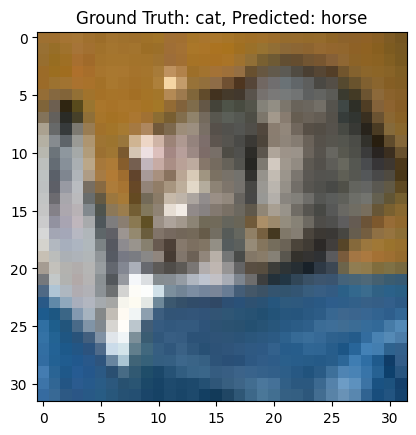

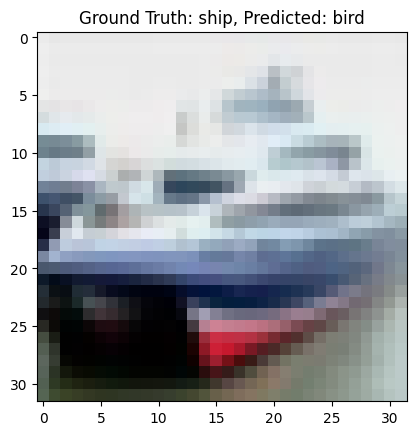

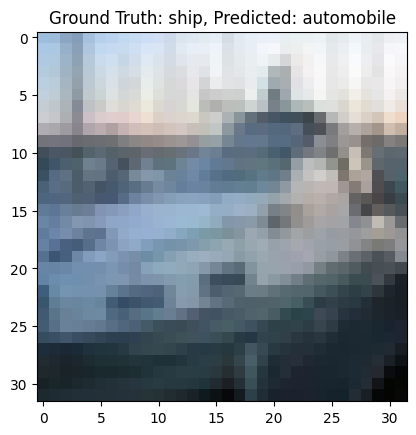

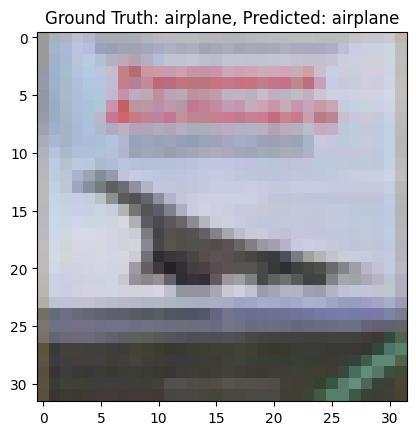

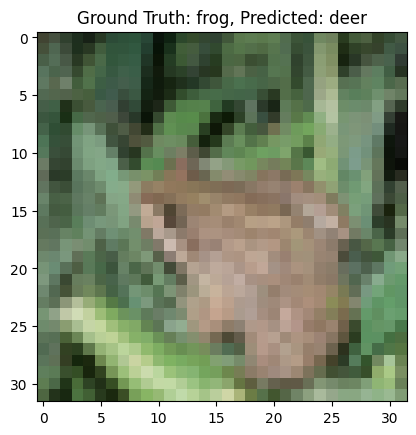

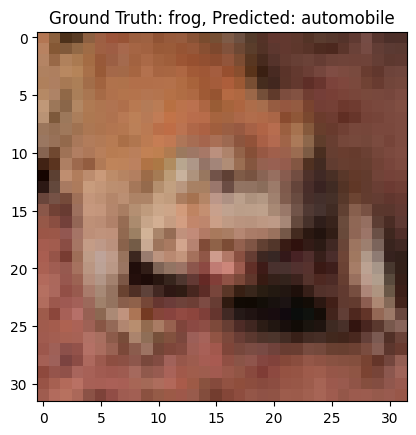

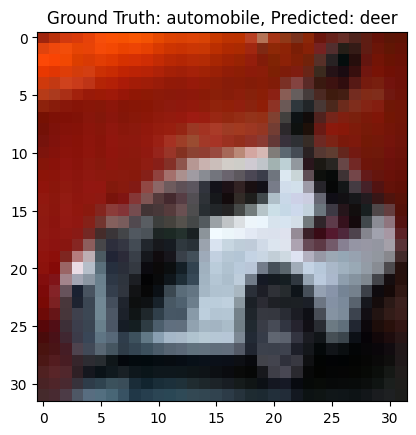

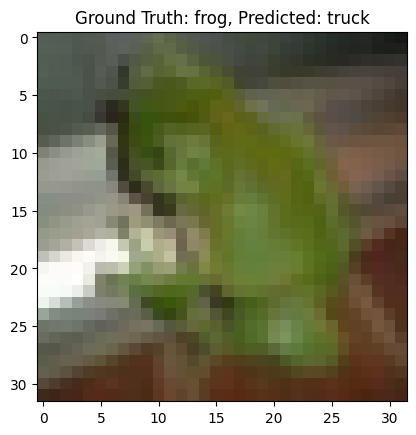

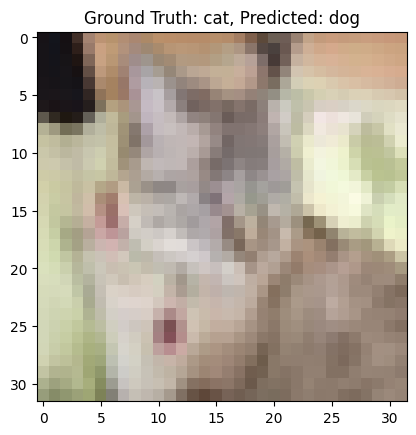

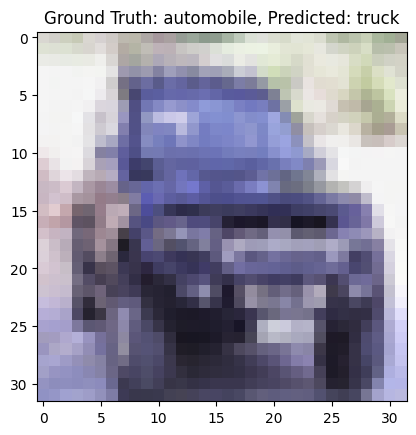

In [ ]:
cifar10 = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}
for idx in range(len(y_pred[:10])):
  plt.title("Ground Truth: {}, Predicted: {}".format(cifar10[np.argmax(y_test[idx])], cifar10[np.argmax(y_pred[idx])]))
  plt.imshow(x_test[idx], cmap='gray')
  plt.show()